# **Deteksi dan Pencegahan Penipuan**

**Tujuan**

- memahami gagasan umum pencegahan penipuan
- melakukan deteksi penipuan cepat sebagai solusi pencegahan

---
**Garis Besar**

1. Pemahaman Bisnis
2. Mengimpor Data
3. Memisahkan Data
4. Analisis Data Eksploratif
5. Deteksi Kecurangan
6. Evaluasi
7. Perhitungan ROI Model
8. Deteksi Kecurangan sebagai Solusi Pencegahan
9. Kesimpulan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Pemahaman Bisnis
---

Ilustrasi proses klaim asuransi kendaraan

- Proses umum klaim asuransi kendaraan:

  1. Pengguna mengajukan permohonan klaim. Biasanya melalui telepon atau email.
  2. Penilai akan memeriksa semua dokumen terkait dan mencatat detail kendaraan serta kerusakan akibat kecelakaan, jika ada.
  3. Semua dokumen dan detail catatan akan dinilai untuk mendapatkan:
      - Validitas klaim
       - Kelayakan klaim
       - Jumlah klaim
  4. Klaim dapat ditolak jika:
       - Pengguna tidak memberikan semua dokumen yang diperlukan sesuai dengan persyaratan perusahaan asuransi
       - Klaim tidak termasuk dalam cakupan pertanggungan. Misalnya, pengemudi mabuk, mobil telah dimodifikasi dari kondisi aslinya saat didaftarkan.


- Apakah ada potensi masalah dalam proses bisnis ini? Terutama terkait dengan penipuan

- Perusahaan asuransi kendaraan mungkin mengalami klaim palsu atau berlebihan yang melibatkan kerusakan kendaraan atau cedera pribadi setelah kecelakaan. Hal ini dapat disebabkan oleh:

    - Kecelakaan yang "direkayasa" oleh penipu
    - Penumpang fiktif di mana orang yang tidak terlibat dalam kecelakaan mengklaim telah menderita cedera serius
    - Cedera pribadi palsu yang dilebih-lebihkan secara berlebihan
- Klaim palsu ditemukan melalui peninjauan manual kemudian sehingga penanganannya terlambat dan mengakibatkan kerugian.

- Perusahaan ingin mendeteksi klaim palsu untuk mencegah kerugian finansial.

- Tidak efektif bagi bisnis untuk menunggu peninjauan bulanan untuk mengetahui aktivitas penipuan
- Perusahaan membutuhkan deteksi penipuan, apakah itu mengurangi kerugian finansial? Sayangnya, tidak. Itu hanya laporan aktivitas penipuan

- Kita perlu mendeteksi penipuan sebelum terjadi, sehingga kita dapat mencegah kerugian finansial, oleh karena itu kita membutuhkan sistem pencegahan penipuan.

- Mendeteksi penipuan sebelum mengambil keputusan atas klaim dan melakukan rekomendasi yang dapat ditindaklanjuti.

- Namun, jika sistemnya seperti ini, beberapa transaksi yang bukan penipuan akan ditolak, pengguna mungkin tidak senang.

- Kita membutuhkan skenario lain.

Klaim yang dicurigai harus ditunda dan dilakukan penyelidikan lebih lanjut secara manual oleh tim khusus.

## 1.1 Tujuan Bisnis
---

- Mengurangi jumlah kerugian dengan mencegah klaim palsu

## 1.2 Data Description

___

- Kami akan menggunakan dataset klaim asuransi kendaraan dari [Klaim Asuransi Kendaraan - Kaggle](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?resource=download)
- Kami hanya akan menggunakan beberapa kolom yang terkait dengan kecelakaan, `PoliceReportFiled` dan detail polis, `NumberOfSuppliments`, jumlah uang yang harus dibayar oleh orang yang diasuransikan `Deductible` dan variabel target, `FraudFound_P`

<center>

|Feature|Type|Desc|
|:--|:--|:--|
|`PoliceReportFiled`|`binary`|Keberadaan laporan kepolisian resmi yang merinci fakta, kronologi, dan keadaan di lokasi kejadian.|
|`NumberOfSuppliments`|`categorical`|Jumlah pengajuan dana tambahan di luar estimasi awal yang disetujui oleh perusahaan asuransi.|
|`Deductible`|`numerical`|Beban biaya mandiri yang harus dibayar pemegang polis sebelum klaim asuransi dapat dicairkan.|
|`FraudFound_P` (**target variable**)|`binary`|Variabel Target: Indikator adanya tindakan kecurangan (1) atau klaim sah (0).|

## 1.3 Mendefinisikan Masalah
---

- Kita menghadapi dua masalah:
  - Jika kita salah memprediksi transaksi penipuan sebagai bukan penipuan, kita akan mengalami kerugian akibat penipuan tersebut.

  - Jika kita salah memprediksi transaksi bukan penipuan sebagai penipuan, kita akan kehilangan pelanggan.

- Oleh karena itu, kita membuat model untuk **mengklasifikasikan** antara penipuan dan bukan penipuan.

Deskripsi Model:

1. **Apa saja inputnya?** Catatan klaim asuransi, `PoliceReportFiled`, `NumberOfSuppliments`, `Deductible`

2. **Apa saja outputnya?** Prediksi `FraudFound_P`,

   - Bernilai `1` jika diprediksi sebagai penipuan, dan

    - `0` jika tidak.

3. **Apa yang kita lakukan dengan prediksi tersebut?** Jika suatu transaksi ditandai sebagai mencurigakan, pengambil keputusan dapat memutuskan:

    - Menandai klaim sebagai mencurigakan DAN

    - Memberi tahu petugas investigasi penipuan.

## 1.4 Tugas

---

- **Tugas:**

  - Klasifikasi klaim asuransi palsu

- **Teknik yang digunakan:**

  - Baseline: all transaction is not fraudulent
  - Expert-based (a ruled-based)
  - Statistics-based

- **Evaluasi:**
  - Akurasi, Presisi, dan Recall
  - Biaya Bisnis & ROI

# 2.Mengimpor Data
___

- kita mengimpor data dari `fraud_oracle_simp.csv`

    """
    Membaca file CSV di jalur yang diberikan, kali ini sumbernya berasal dari repositori google drive pribadi.

    dan mengembalikan isinya sebagai DataFrame pandas.

    Parameters
    ----------
    path : str
        Jalur input data sampel (format csv)

    Return
    ------
    df : pd.DataFrame
        Input data sampel
    """

In [2]:
def read_data(path):
  data = pd.read_csv(path)
  print(f"Jumlah Baris: {data.shape[0]}")
  print(f"Jumlah Kolom: {data.shape[1]}")
  return data

In [3]:
path = '/content/drive/MyDrive/1. Data Science, Data Analyst & Machine Learning/5. Skill 100 Pacman/1. Data Science/10. Fraud Analytics Statistical Approach (Project)/dataset/W2/fraud_oracle_simp.csv'
data = read_data(path)

Jumlah Baris: 15420
Jumlah Kolom: 4


In [4]:
data.head()

,PoliceReportFiled,NumberOfSuppliments,Deductible,FraudFound_P
0,No,none,300,0
1,Yes,none,400,0
2,No,none,400,0
3,Yes,more than 5,400,0
4,No,none,400,0


In [5]:
#lower
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   policereportfiled    15420 non-null  object
 1   numberofsuppliments  15420 non-null  object
 2   deductible           15420 non-null  int64 
 3   fraudfound_p         15420 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 482.0+ KB


# 3.Memisahkan Data

___

- Tujuan kita adalah mengklasifikasikan data transaksi yang belum pernah dilihat sebelumnya, oleh karena itu kita perlu memastikan bahwa kita tidak membocorkan data transaksi yang belum pernah dilihat sebelumnya selama pelatihan.

- Tugas kita:

    1. Membagi data menjadi `input` (`X`) dan `output` (`y`)
    2. Membagi data menjadi `train` (60% data), `valid` (20% data), dan `test` (20% data).
        - Data `train`: akan digunakan untuk membangun teknik
        - Data `validation`: akan digunakan untuk memilih teknik terbaik
        - Data `test`: akan digunakan untuk evaluasi akhir

**Split Input & Output**


    Fungsi untuk memisahkan input (x) dan output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """

In [7]:
# function split input and output
def split_input_output(data, target_column):
  X = data.drop(target_column, axis=1)
  y = data[target_column]

  print('X shape :', X.shape)
  print('y shape :', y.shape)
  return X, y

In [8]:
# Split input x and output y
X, y = split_input_output(data, 'fraudfound_p')

X.head()

X shape : (15420, 3)
y shape : (15420,)


,policereportfiled,numberofsuppliments,deductible
0,No,none,300
1,Yes,none,400
2,No,none,400
3,Yes,more than 5,400
4,No,none,400


In [9]:
y.head()

,fraudfound_p
0,0
1,0
2,0
3,0
4,0


**Validasi Dimensi Data**

kita ingin memvalidasi apakah dimensi data sesuai dengan standar data dalam proses definisi data.

In [10]:
# check data dimension
n_samples, n_features = X.shape
print(f"Jumlah Sample : {n_samples}")
print(f"Jumlah Fitur  : {n_features}")

Jumlah Sample : 15420
Jumlah Fitur  : 3


In [11]:
# check data features name
features_name =  X.columns

# print name of features
print(f'nama fitur : {features_name}')

nama fitur : Index(['policereportfiled', 'numberofsuppliments', 'deductible'], dtype='object')


**Split Train, Valid, and Test**

- Buat fungsi untuk membagi data pelatihan, validasi, dan pengujian.

    """
    Pisahkan data menjadi data latih & data uji

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):

  X_train, X_not_train, y_train, y_not_train = train_test_split(
      X,
      y,
      test_size = test_size + valid_size,
      stratify = stratify,
      random_state = random_state
  )

  X_valid, X_test, y_valid, y_test = train_test_split(
      X_not_train,
      y_not_train,
      test_size = valid_size /( test_size + valid_size),
      stratify = y_not_train,
      random_state = random_state
  )


  print(f"X_train shape : {X_train.shape}")
  print(f"X_valid shape : {X_valid.shape}")
  print(f"X_test shape : {X_test.shape}")
  print(f"y_train shape : {y_train.shape}")
  print(f"y_valid shape : {y_valid.shape}")
  print(f"y_test shape : {y_test.shape}")

  return X_train, X_valid, X_test, y_train, y_valid, y_test

In [14]:
# Run the code
splitter_data = split_train_valid_test(X = X,
                                       y = y,
                                       test_size=0.2,
                                       valid_size=0.2,
                                       stratify=y,
                                       random_state=42)


X_train, X_valid, X_test, y_train, y_valid, y_test = splitter_data

X_train shape : (9252, 3)
X_valid shape : (3084, 3)
X_test shape : (3084, 3)
y_train shape : (9252,)
y_valid shape : (3084,)
y_test shape : (3084,)


**Ringkasan**
  - Sekarang kita memiliki data pelatihan, validasi, dan pengujian
      - test_size = 20% dari data asli,

      - validation_size = 20% dari data asli,

      - train_size = 60% dari data asli

- Kami akan fokus pada data pelatihan di EDA

# 4.Exploratory Data Analysis
    
___

- Idealnya, kita melakukan EDA untuk lebih memahami data dengan:

    - Menemukan distribusi/korelasi data
    - Menemukan outlier
    - Menemukan cara untuk mengimputasi nilai yang hilang
    - dll.

- Pada sesi ini, kita akan:

    - Memeriksa deskripsi statistik
    - Memeriksa nilai yang hilang
    - Memeriksa distribusi data

- Kemudian, kita dapat merencanakan pra-pemrosesan jika diperlukan

In [15]:
# Print train set shape
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")

X_train shape : (9252, 3)
y_train shape : (9252,)


In [16]:
# create EDA dataset
data_eda = pd.concat([X_train, y_train], axis=1)
data_eda.head()

,policereportfiled,numberofsuppliments,deductible,fraudfound_p
2839,No,more than 5,400,0
5783,No,none,400,0
10425,No,none,400,0
10966,No,none,400,0
14520,No,more than 5,400,0


In [17]:
# Print train set shape after concat
data_eda.shape

(9252, 4)

## 4.1.Periksa deskripsi statistik
___

In [18]:
data_eda.describe()

,deductible,fraudfound_p
count,9252.000000,9252.000000
mean,408.365759,0.059879
std,46.301417,0.237275
min,300.000000,0.000000
25%,400.000000,0.000000
50%,400.000000,0.000000
75%,400.000000,0.000000
max,700.000000,1.000000


In [19]:
# Check unique values, and top frequecies
data_eda.describe(include=["O"])

,policereportfiled,numberofsuppliments
count,9252,9252
unique,2,4
top,No,none
freq,8995,4177


In [20]:
# Check min, max and quartile values
data_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
deductible,9252.0,408.365759,46.301417,300.0,400.0,400.0,400.0,700.0
fraudfound_p,9252.0,0.059879,0.237275,0.0,0.0,0.0,0.0,1.0


**Ringkasan**

    - `PoliceReportFiled` dan `NumberOfSuppliments` adalah kategori
    - `PoliceReportFiled` memiliki 2 nilai unik dan `NumberOfSuppliments` memiliki 4 nilai unik
    - Sebagian besar klaim tidak memiliki laporan polisi, dan tidak ada tambahan
    - Pada kolom deductible, kuantil ketiga 75% adalah 400, sedangkan nilai maksimumnya adalah 700. Ini menunjukkan adanya outlier atau pencilan di sisi atas, karena sebagian besar data (75%) mentok di angka 400.Pada -
    - kolom fraudfound_p, nilai kuantil 25%, 50%, hingga 75% semuanya adalah 0. Ini mengonfirmasi bahwa kasus penipuan (nilai 1) adalah kejadian langka dalam dataset ini.

## 4.2.Periksa nilai yang hilang
___

Periksa nilai yang hilang untuk menanganinya jika ada.

In [21]:
data_eda.isna().sum()

,0
policereportfiled,0
numberofsuppliments,0
deductible,0
fraudfound_p,0


**Ringkasan**
- Tidak ada nilai yang hilang

## 4.3.Periksa Distribusi
___

**Proporsi kelas**

In [22]:
data_eda['fraudfound_p'].value_counts(normalize=True)

,proportion
fraudfound_p,
0,0.940121
1,0.059879


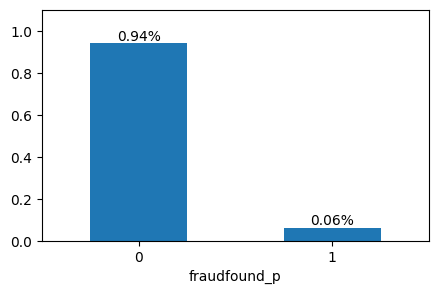

In [23]:
data_eda['fraudfound_p'].value_counts(normalize=True).plot.bar(figsize=(5, 3), rot=0)
ax = data_eda['fraudfound_p'].value_counts(normalize=True).plot.bar(figsize=(5, 3), rot=0)
ax.bar_label(ax.containers[0], fmt='%.2f%%')

# Opsional: Menyesuaikan batas atas y agar label tidak terpotong
import matplotlib.pyplot as plt
plt.ylim(0, 1.1)
plt.show()

- Berdasarkan plot proporsi kelas, variabel target `fraudfound_p` sangat tidak seimbang, dengan kelas mayoritas adalah `0` (bukan penipuan) dan kelas minoritas adalah `1` (penipuan). Hal ini umum terjadi pada dataset deteksi penipuan.

**PoliceReportFiled**

<Axes: xlabel='policereportfiled', ylabel='fraudfound_p'>

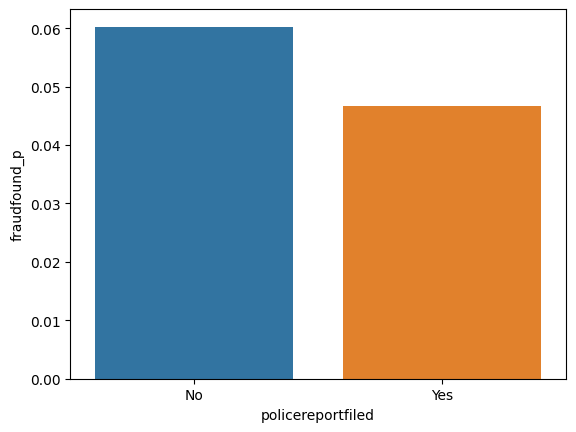

In [24]:
# Visualize the PoliceReportFiled
sns.barplot(data=data_eda, x='policereportfiled', y='fraudfound_p', hue='policereportfiled',errorbar=None)



Kecelakaan tanpa laporan polisi memiliki kemungkinan lebih tinggi terjadinya penipuan dibandingkan kecelakaan dengan laporan polisi.

**NumberOfSuppliments**

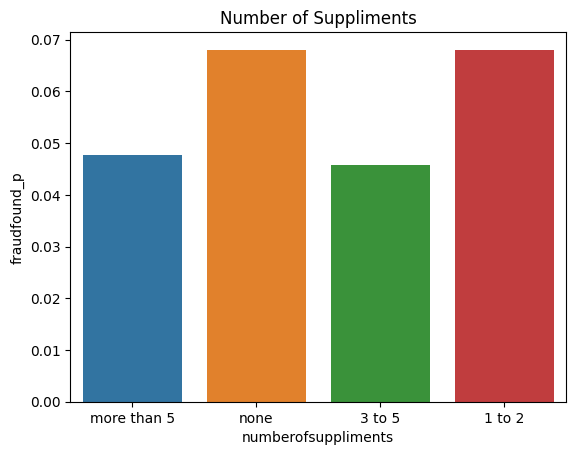

In [25]:
# Visualize the NumberOfSuppliments
sns.barplot(data=data_eda,
            x="numberofsuppliments",
            y="fraudfound_p",
            errorbar=None,
            hue='numberofsuppliments')

plt.title("Number of Suppliments")
plt.show()

Semakin sedikit jumlah lampiran, semakin tinggi kemungkinan terjadinya penipuan. (Ini tidak masuk akal, jika penipu menginginkan keuntungan tinggi, mereka seharusnya memiliki banyak lampiran, hmm apa yang terjadi? perlu analisis tambahan)

**Deductible**

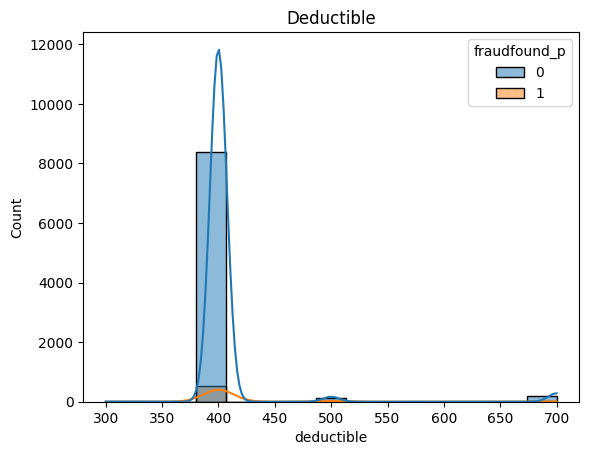

In [26]:
# Visualize the Deductible
sns.histplot(data=data_eda, x='deductible', hue='fraudfound_p', kde=True)
plt.title("Deductible")
plt.show()

Tampaknya nilai deductible memiliki nilai-nilai tertentu.

In [27]:
# Check values of deductible
data_eda.groupby('fraudfound_p')['deductible'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudfound_p,,,,,,,,
0,8698.0,408.162796,46.171640,300.0,400.0,400.0,400.0,700.0
1,554.0,411.552347,48.224629,400.0,400.0,400.0,400.0,700.0


In [28]:
data_eda.groupby('fraudfound_p')['deductible'].value_counts()

fraudfound_p  deductible
0             400           8378
              700            199
              500            117
              300              4
1             400            514
              500             28
              700             12
Name: count, dtype: int64

Nilai yang diterima hanya 300, 400, 500, 700.

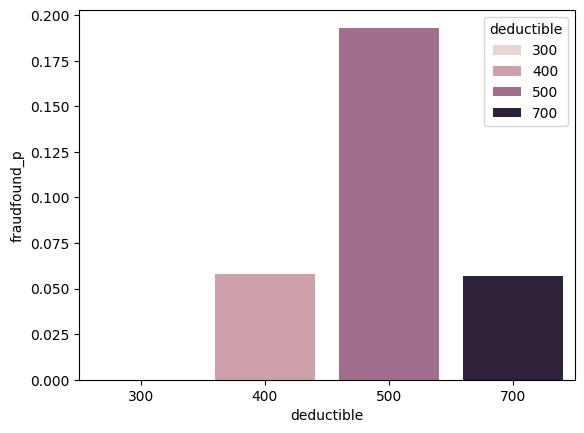

In [29]:
# Visualize the Deductible using Barplot to see their proportion of each class clearly
sns.barplot(data=data_eda, x='deductible', y='fraudfound_p',hue='deductible',errorbar=None)
plt.show()

Nilai deductible sebesar 500 memiliki probabilitas lebih tinggi dibandingkan nilai lainnya.

**Ringkasan EDA**

  - Sebagian besar kasus bukan penipuan, hanya 5,9% yang merupakan penipuan
  - Tidak ditemukan nilai yang hilang dalam data
  - Fitur target tidak dapat dipisahkan oleh semua kolom yang kita miliki.
  - Tidak ada langkah pra-pemrosesan data lain yang perlu kita lakukan

# 5.Fraud Detection
---

Untuk mendeteksi kecurangan, kami menggunakan tiga pendekatan:

1. Naive prediction
2. Expert-based prediction
3. Statistics-based prediction

Kemudian, kami membuat model dan mengevaluasi model tersebut.

## **5.1 Naive Prediction - Baseline Model**
---

- kita mendefinisikan the baseline model as 'naive' karena kita memprediksi semua data masukan sebagai kelas yang paling sering muncul dalam data pelatihan.

- Contoh:

- Jika data pelatihan kita memiliki <br>
<center>

|Class|Class Proportion|
|:--:|:--:|
|`0`|0.94|
|`1`|0.06|

</center>

- Kelas yang paling sering muncul = `0`
- Jadi kami memprediksi semua masukan sebagai `0`

- Kita bisa menggunakan `DummyClassifier` untuk memodelkannya.

In [30]:
# Import DummyClassifier from Sklearn Library
from sklearn.dummy import DummyClassifier

## **5.2 Expert Based**
---

- Berdasarkan pengalaman & keahlian mereka, suatu transaksi dikategorikan sebagai **fraud**

JIKA:

      - Tidak ada laporan polisi, ATAU
      - Memiliki banyak tambahan (suppliments)

MAKA:

     - andai klaim sebagai mencurigakan DAN
     - Beri tahu petugas investigasi penipuan.

- Kita dapat membuat model untuk menandai sesuai dengan aturan para ahli.

    """
    Flag fraud using expert rules
    The rules:
        - if `PoliceReportFiled` is "No", OR
             `NumberOfSuppliments` is "more than 5"
          then return 1 (fraud)
        - else return 0 (not fraud)
    """

In [31]:
# Create a model
class ExpertBased:
  def fit(self, X, y):
    pass

  def predict(self, X):
    cond_policereport = (X['policereportfiled']=="No")
    cond_suppliments = (X['numberofsuppliments']== "more than 5")
    y_pred = (cond_policereport & cond_suppliments).astype(int)


    return (y_pred)

## **5.3 Statistics Based - IQR**
---

- kita menggunakan pendekatan IQR untuk menentukan data mana yang *jauh dari normal*, karena kemungkinan besar merupakan penipuan.
- Dalam model ini, kami hanya menggunakan kolom `Deductible`.

- Dari pengetahuan sebelumnya kita memiliki nilai minimum dan maksimum yang berpotensi sebagai ambang batas
  - Tandai transaksi curang jika **di bawah nilai minimum**, atau **melebihi nilai maksimum**
  - Kita hanya akan menggunakan nilai maksimum sebagai ambang batas atas karena kolom yang akan kita gunakan adalah `Jumlah` transaksi
  - Kita tidak akan menggunakan nilai minimum sebagai batas bawah karena secara logika, pelaku penipuan tidak akan mendapatkan keuntungan dari transaksi yang sangat kecil, di bawah nilai minimum, atau bahkan negatif.

    """
    Flag fraud using IQR threshold
    """

In [32]:
class IQRthreshold:
  def fit(self, X, y):

    X=X["deductible"].copy()

    q1 = X.quantile(0.25)
    q3 = X.quantile(0.75)
    iqr = q3 - q1
    self.threshold = q3 + 1.5 * iqr

  def predict(self, X):

    y_pred = (X["deductible"] > self.threshold).astype(int)
    return y_pred

# 6.Evaluations
---

- Untuk mengevaluasi model, pertama-tama kita perlu merangkum hasil prediksi (atau disebut juga the confusion matrix).


<center>

||Predicted Fraud (`1`)|Predicted not Fraud (`0`)|
|--:|:--:|:--:|
|**Actual Fraud** (`1`)|True Positive (TP) - Correct!|False Negative (FN) - Wrong!|
|**Actual not Fraud** (`0`)|False Positive (FP) - Wrong!|True Negative (TN) - Correct!|

</center>


- Setelah merangkum, kita dapat menghitung beberapa metrik seperti: `akurasi`, `presisi`, `recall`, atau `metrik khusus`.

    """
    Summarize the prediction results

    Parameters
    ----------
    y_act : array-like
        The true target (y actual)

    y_pred : array-like
        The predicted

    Return
    ------
    crosstab_table : pd.DataFrame
        The crosstab table (confusion matrix)
        [[TP, FN],
         [FP, TN]]
    """

In [33]:
# Create a function to summarize prediction results
def cross_tab(y_act, y_pred):
  # Extract the prediction
  fp = np.sum((y_act == 0) & (y_pred == 1))
  fn = np.sum((y_act == 1) & (y_pred == 0))
  tp = np.sum((y_act == 1) & (y_pred == 1))
  tn = np.sum((y_act == 0) & (y_pred == 0))

  # Summarize
  crosstab_table = pd.DataFrame([[tp, fn],
                                 [fp, tn]],
                                columns=['Predicted Fraud', 'Predicted not Fraud'],
                                index=['Actual Fraud', 'Actual not Fraud']
                                )

  return crosstab_table



## 6.1 Training Set
___

Mari kita buat modelnya

### **1. Naive Model - Baseline**
___

In [34]:
# Create model object
base_model_clf = DummyClassifier(strategy="most_frequent")


# Fit model on Train data
base_model_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [35]:
# Predict on Train data
y_pred_train_base = base_model_clf.predict(X_train)
y_pred_train_base

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
np.unique(y_pred_train_base)

array([0])

Lihat, semua data diprediksi sebagai kelas yang paling sering muncul, yaitu 0.

- Selanjutnya, rangkum hasil prediksinya

In [37]:
eval_base = cross_tab(y_train, y_pred_train_base)
eval_base

,Predicted Fraud,Predicted not Fraud
Actual Fraud,0,554
Actual not Fraud,0,8698


- Dari `eval_base` yang diberikan di atas, kita dapat memvalidasi apakah model dasar kita bekerja dengan benar atau tidak.
- Model dasar kita memprediksi semua kasus penipuan (`1`) sebagai kasus yang paling sering terjadi, yang bukan penipuan (`0`)
- Jadi, `penipuan aktual` yang diprediksi **sebagai penipuan** adalah 0.

- Untuk evaluasi lebih lanjut, mari kita jawab beberapa pertanyaan di bawah ini

#### 1.Berapa banyak prediksi yang benar yang dibuat oleh model?

---

Angka ini menunjukkan `akurasi` prediksi.

    """
    Calculate the accuracy of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    acc: float
        The accuracy of the model
    """

In [38]:
# Function to calculate the accuracy
def accuracy(eval_table):

  tp = eval_table.loc["Actual Fraud", "Predicted Fraud"]
  tn = eval_table.loc["Actual not Fraud", "Predicted not Fraud"]
  fp = eval_table.loc["Actual not Fraud", "Predicted Fraud"]
  fn = eval_table.loc["Actual Fraud", "Predicted not Fraud"]

  n_cor = tp + tn
  n_all = eval_table.values.sum()

  acc = n_cor / n_all

  return acc

In [39]:
# Calculate the accuracy
acc_base = accuracy(eval_base)
print(f'Accuracy : {100*acc_base:.4f} %')

Accuracy : 94.0121 %


- Akurasi yang luar biasa! Tapi, apakah ini menjadi model yang bagus?

#### 2.Berapa banyak transaksi penipuan yang dapat dideteksi oleh model?

---

Angka ini merupakan `recall` (Jumlah penipuan aktual yang diprediksi)

    """
    Calculate the recall of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    recall: float
        The recall of the model
    """

In [40]:
def recall(eval_table):
  tp = eval_table.loc["Actual Fraud", "Predicted Fraud"]
  fn = eval_table.loc["Actual Fraud", "Predicted not Fraud"]

  n_act_pos = tp + fn
  n_cor_pos = tp

  recall = n_cor_pos / n_act_pos
  return recall

In [41]:
# Calculate the recall
recall_base = recall(eval_table=eval_base)
print(f'Recall : {100*recall_base:.4f} %')

Recall : 0.0000 %


- Wow! Persentase recall-nya 0,0%
- Model ini tidak dapat mendeteksi transaksi penipuan apa pun.
- Ini temuan yang bagus!

#### 3.Dari transaksi penipuan yang diprediksi, berapa banyak yang benar-benar penipuan?

---

Angka ini memperhitungkan `akurasi` (Jumlah penipuan sebenarnya dari penipuan yang diprediksi)

    """
    Calculate the precision of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    precision: float
        The precision of the model
    """

In [42]:
# Function to calculate the precision
def precision(eval_table):

  tp = eval_table.loc["Actual Fraud", "Predicted Fraud"]
  fp = eval_table.loc["Actual not Fraud", "Predicted Fraud"]

  n_pred_pos = tp + fp
  n_cor_pos = tp

  precision = n_cor_pos / (n_pred_pos + 1e-6)

  return precision

In [43]:
# Calculate the precision
precision_base = precision(eval_table=eval_base)
print(f'Precision : {100*precision_base:.4f} %')

Precision : 0.0000 %


#### 4.Tingkat Positif Palsu (FPR)
Rumus:

<center>
FP/(TN+FP) atau 1- Kekhususan
</center>

Penjelasan: Dari semua kejadian non-fraud yang sebenarnya, berapa persen yang salah terdeteksi sebagai penipuan. Ini adalah metrik langsung untuk mengukur "alarm palsu".

In [44]:
def FPR(eval_table):

  tn = eval_table.loc["Actual not Fraud", "Predicted not Fraud"]
  fp = eval_table.loc["Actual not Fraud", "Predicted Fraud"]

  n_pred_neg = tn + fp
  n_neg = tn

  FPR = fp / (n_pred_neg + 1e-6)
  return FPR

In [45]:
# Calculate the FPR
FPR_base = FPR(eval_table=eval_base)
print(f'FPR : {100*FPR_base:.4f} %')

FPR : 0.0000 %


#### 5.Berapa biaya yang ditimbulkan model tersebut bagi perusahaan dari prediksi yang benar dan salah?

---

- Ini adalah metrik yang berasal dari perspektif bisnis.

- Untuk membangun metrik ini, kita perlu memperhitungkan risiko dari setiap kesalahan prediksi.

- **Jika kita memprediksi bukan penipuan sebagai penipuan** (positif palsu),

    - kita akan kehilangan potensi keuntungan dari transaksi
    - kita akan kehilangan pelanggan, jadi Anda perlu mendapatkan pengguna baru

- **Sebaliknya, jika kita memprediksi penipuan sebagai bukan penipuan** (negatif palsu),
    - kita akan mengalami kerugian akibat penipuan

- Mari kita simulasikan metrik ini dengan asumsi:
    - Biaya rata-rata kasus penipuan: $120/transaksi
    - Biaya rata-rata untuk mendapatkan pengguna baru: $15/pengguna
    - Kerugian rata-rata potensi keuntungan: $50/transaksi

- Jadi rumusnya adalah


$$
\text{cost} = \left(\text{fp} \times (\$ 15 + \$ 50)\right) + \left(\text{fn} \times \$ 120\right)
$$

    """
    Calculate the business-side cost of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    cost: float
        The total cost according to business assumptions
    """

In [46]:
# Calculate the loss from false prediction

def cost_loss(eval_table):

  n_total = eval_table.values.sum()
  perc_eval_table = eval_table/n_total

  fp_perc = perc_eval_table.loc["Actual not Fraud", "Predicted Fraud"]
  fn_perc = perc_eval_table.loc["Actual Fraud", "Predicted not Fraud"]

  # Simulate number of user
  n_user = 100_000
  fn = int(n_user * fn_perc)
  fp = n_user - fn

  # Simulate cost
  cost_fraud = 120
  cost_acquired = 15
  cost_profit = 50

  fn_cost = fn * cost_fraud
  fp_cost = fp * (cost_acquired  +  cost_profit)
  total_cost = fn_cost + fp_cost

  return total_cost


In [47]:
# Calculate total loss
cost_base = cost_loss(eval_table=eval_base)
print(f'Total Cost : ${cost_base:,.2f}')


Total Cost : $6,829,285.00


**Ringkasan**

- Sekarang, mari kita rangkum semua metriknya

In [48]:
#Summary

summary_evaluation_train = pd.DataFrame([[acc_base,recall_base, precision_base, FPR_base, cost_base]],
                                         columns = ["Accuracy","Recall", "Precision", "FPR", "Business Cost ($)"],
                                        index =["Baseline"]
                                        )

summary_evaluation_train

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940121,0.0,0.0,0.0,6829285


- Great!
- Let's evaluate other models

### **2. Evaluate Other Models**
___

- Mari kita buat hidup kita lebih bahagia dengan meringkas hasil model secara otomatis.

In [49]:
def model_summary(model, model_name, X, y):
  y_pred = model.predict(X)

  eval_table = cross_tab(y, y_pred)

  accuracy_ = accuracy(eval_table)
  recall_ = recall(eval_table)
  precision_ = precision(eval_table)
  FPR_ = FPR(eval_table)
  cost_ = cost_loss(eval_table)


  summary = pd.DataFrame(
      [[accuracy_,recall_, precision_, FPR_, cost_]],
      columns = ["Accuracy","Recall", "Precision", "FPR", "Business Cost ($)"],
      index =[model_name]
  )

  return summary

- Sekarang mari kita mulai membuat model

**Expert-based**

In [50]:
# Create model
expert_clf = ExpertBased()

# Fit model
expert_clf.fit(X_train, y_train)

# Evaluate
summary_expert = model_summary(expert_clf, "Expert-based", X_train, y_train)
summary_expert


,Accuracy,Recall,Precision,FPR,Business Cost ($)
Expert-based,0.715845,0.198556,0.04793,0.251207,6763890


In [51]:
# Add to summary evaluation train
summary_evaluation_train = pd.concat((summary_evaluation_train, summary_expert),
                                     axis=0)
summary_evaluation_train

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940121,0.000000,0.00000,0.000000,6829285
Expert-based,0.715845,0.198556,0.04793,0.251207,6763890


**Statistics Based - IQR**

In [52]:
# Create model
stats_clf = IQRthreshold()

# Fit model
stats_clf.fit(X_train, y_train)

# Evaluate
summary_stats = model_summary(stats_clf, "Statistics-based", X_train, y_train)
summary_stats

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Statistics-based,0.91029,0.072202,0.11236,0.03633,6805525


In [53]:
# Add to summary evaluation train
summary_evaluation_train = pd.concat((summary_evaluation_train, summary_stats),
                                     axis = 0)
summary_evaluation_train

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940121,0.000000,0.00000,0.000000,6829285
Expert-based,0.715845,0.198556,0.04793,0.251207,6763890
Statistics-based,0.910290,0.072202,0.11236,0.036330,6805525


**Ringkasan**

- Akurasi yang dihasilkan menyesatkan.

- Dalam hal ini, akurasi yang lebih tinggi tidak berarti kinerja yang lebih baik untuk mendeteksi penipuan.

- Untuk memprediksi kasus penipuan nyata, **Expert Based** berkinerja lebih baik daripada yang lain, yaitu memprediksi dengan benar 198 penipuan dari 1000 kasus penipuan (`recall`).

- Namun, dengan 1000 kasus yang diprediksi sebagai penipuan, metode **Expert Based** hanya memprediksi 5 kasus dengan benar (`presisi`).

- Dari segi kinerja bisnis, kita mendapatkan bahwa **Expert Based** berkinerja lebih baik dengan biaya paling rendah.

- Apakah itu menjadikan **Expert Based** model terbaik kita untuk mendeteksi penipuan?

- BELUM! Mari kita validasi pada **set validasi**

## 6.2 Validation Set
___

- **Tujuan kita**: memilih model terbaik yang memiliki kerugian minimum pada set validasi

- Mari kita rangkum semua model pada set validasi


In [54]:
# Summary baseline
summary_base_valid = model_summary(base_model_clf, "Baseline", X_valid, y_valid)

summary_evaluation_valid = summary_base_valid.copy()
summary_evaluation_valid

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940013,0.0,0.0,0.0,6829890


In [55]:
# Summary expert-based
summary_expert_valid = model_summary(expert_clf, "Expert-based", X_valid, y_valid)

summary_evaluation_valid = pd.concat((summary_evaluation_valid, summary_expert_valid),
                                     axis=0)
summary_evaluation_valid

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940013,0.000000,0.000000,0.000000,6829890
Expert-based,0.732815,0.221622,0.056865,0.234564,6756795


In [56]:
# Summary statistics-based
summary_stats_valid = model_summary(stats_clf, "Statistics-based", X_valid, y_valid)

summary_evaluation_valid = pd.concat((summary_evaluation_valid, summary_stats_valid),
                                     axis=0)
summary_evaluation_valid

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940013,0.000000,0.000000,0.000000,6829890
Expert-based,0.732815,0.221622,0.056865,0.234564,6756795
Statistics-based,0.915370,0.081081,0.141509,0.031390,6803160


**Ringkasan**

- Bagus! Kita melihat pola kinerja yang serupa pada set validasi.
- Model **Expert-based** berkinerja lebih baik daripada yang lain, jadi ini adalah **model terbaik** kami untuk mendeteksi penipuan yang meminimalkan biaya sejauh ini.

## 6.3 Test Set
___

- Ingat, **hanya kunjungi set data uji** jika kita sudah memiliki model terbaik.

- Mari kita evaluasi.

In [57]:
# Summary statistics-based
summmary_best = model_summary(expert_clf, "Expert-based Best", X_valid, y_valid)

summary_evaluation_test = summmary_best.copy()
summary_evaluation_test


,Accuracy,Recall,Precision,FPR,Business Cost ($)
Expert-based Best,0.732815,0.221622,0.056865,0.234564,6756795


In [58]:
summary_expert_test = model_summary(expert_clf, "Expert-based Test", X_test, y_test)



summary_evaluation_test = pd.concat((summary_evaluation_test, summary_expert_test),
                                     axis=0)
summary_evaluation_test


,Accuracy,Recall,Precision,FPR,Business Cost ($)
Expert-based Best,0.732815,0.221622,0.056865,0.234564,6756795
Expert-based Test,0.725681,0.211957,0.052703,0.241724,6758555


In [59]:
((6758555-6756795) / 67585555 )*100

0.0026041067503255687

- Bagus! Biayanya sedikit lebih tinggi, tetapi hanya berbeda +0,026% dari kinerja biaya model terbaik kita.

#7.ROI Calculation of Models
---

- kita memiliki model terbaik, aturan (expert-based) berbasis ahli yang memiliki biaya bisnis paling rendah.
- Namun, selain biaya yang dapat kita capai dari hasil prediksi, kita perlu mempertimbangkan manfaat, biaya kepemilikan model, dan biaya penanganan kecurangan.
- Pengembalian investasi (ROI) didefinisikan sebagai rasio pengembalian (manfaat atau laba bersih) terhadap investasi sumber daya yang menghasilkan pengembalian ini.
- Baik pengembalian maupun investasi biasanya dinyatakan dalam satuan moneter, sedangkan ROI dihitung sebagai persentase.

$$\text{ROI} = \frac{\text{Total utility}}{\text{Total cost of ownership + Total cost of fraud handling}}$$

- Mari kita hitung ROI dari model yang kita buat

## **1. Total Utility**

- Untuk menghitung utilitas total, kita perlu memperhitungkan biaya dan manfaat dari setiap prediksi *JIKA* perusahaan menolak klaim yang diprediksi sebagai penipuan dan menyetujui klaim yang diprediksi bukan penipuan.

**Cost**

- **Jika kita memprediksi bukan penipuan sebagai penipuan** (positif palsu) False Positive - FP,
    - kita akan kehilangan potensi keuntungan dari transaksi
    - kita akan kehilangan pelanggan, sehingga Anda perlu mendapatkan pengguna baru

- **Sebaliknya, jika kita memprediksi penipuan sebagai bukan penipuan** (negatif palsu) False Negative - FN,
    - kita akan mengalami kerugian akibat penipuan

**Benefit**

- **Jika kita memprediksi dengan benar bahwa itu adalah penipuan** (positif benar) True Positive - TP ,
    - kita akan terhindar dari kerugian akibat penipuan

- **Sebaliknya, jika kita memprediksi bahwa itu bukan penipuan** (negatif benar) True Negative - TN ,
    - kita akan mendapatkan keuntungan dari transaksi tersebut

- Mari kita simulasikan metrik ini dengan asumsi:
    - Biaya rata-rata kasus penipuan: $120/transaksi
    - Biaya rata-rata untuk mendapatkan pengguna baru: $15/pengguna
    - Potensi keuntungan rata-rata: $50/transaksi

**Dapatkan Prediksi dari Set Pengujian**

In [60]:
# Make prediction
y_pred_test = expert_clf.predict(X_test)

# Get the eval table
eval_table_test = cross_tab(y_test, y_pred_test)
eval_table_test


,Predicted Fraud,Predicted not Fraud
Actual Fraud,39,145
Actual not Fraud,701,2199


In [61]:
# define the correct prediction in each class
tp_test = eval_table_test.loc["Actual Fraud", "Predicted Fraud"]
tn_test = eval_table_test.loc["Actual not Fraud", "Predicted not Fraud"]


# define the false prediction in each class
fp_test = eval_table_test.loc["Actual not Fraud", "Predicted Fraud"]
fn_test = eval_table_test.loc["Actual Fraud", "Predicted not Fraud"]


In [62]:
cost_fraud = 120
cost_acquired = 15
cost_profit = 50

### Cost

In [63]:
# Calculate the total cost
fn_cost = fn_test * cost_fraud
fp_cost = fp_test * (cost_acquired  +  cost_fraud)
total_cost = fn_cost + fp_cost
print(f'Total Cost : ${total_cost:,.2f}') # Calculate the total benefit


Total Cost : $112,035.00


### Benefit

In [64]:
tp_benefit = tp_test * cost_fraud
tn_benefit = tn_test * cost_profit
total_benefit = tp_benefit + tn_benefit
print(f'Total Benefit : ${total_benefit:,.2f}')

Total Benefit : $114,630.00


### Total Utility

Hitung utilitas total sebagai pengurangan Manfaat dan Biaya sebagai representasi dari total pengembalian.

- Cost berbentuk negatif karena merupakan jumlah yang harus kita rugikan sebagai imbalan, kita menggunakan model ini.

- Benefit berbentuk positif karena merupakan jumlah yang dapat kita peroleh sebagai imbalan, kita menggunakan model ini.

In [65]:
# Calculate the total utility
total_utility = total_benefit - total_cost
print(f'Total Utility : ${total_utility:,.2f}')

Total Utility : $2,595.00


## **2. Total Cost of Ownership**

- Rincian komponen yang kita perlukan untuk menghitung total biaya kepemilikan bergantung pada perusahaan dan industri.


- Pada bagian ini, anggap biaya kepemilikan yang kita miliki berasal dari:
    - Biaya Akuisisi (biaya perangkat lunak, perangkat keras, biaya jaringan dan keamanan, biaya pengembang model): `$15000`
    - Biaya Operasional (Biaya Migrasi Model, Penyiapan, Pemantauan, dan Dukungan): `$15000`

In [66]:
# Calculate the total cost of ownership
acq_cost = 15000
op_cost = 15000
total_cost_ownership = acq_cost + op_cost
print(f'Total Cost of Ownership : ${total_cost_ownership:,.2f}')

Total Cost of Ownership : $30,000.00


## **3. Total Cost of Fraud Handling**

- Total biaya penanganan penipuan meliputi biaya inspeksi dan biaya hukum.

- kira berasumsi:
    - Biaya penanganan penipuan: $100/klaim
    - Biaya hukum: $5000

In [67]:
# Calculate the total cost of Fraud Handling
inspection_cost = tp_test * 100
legal_cost = 5000
total_cost_handling_fraud = inspection_cost + legal_cost
print(f'Total Cost of Fraud Handling : ${total_cost_handling_fraud:,.2f}')

Total Cost of Fraud Handling : $8,900.00


## **4. Calculate ROI**

In [68]:
ROI = (total_utility / (total_cost_ownership + total_cost_handling_fraud)) * 100
print(f'ROI : {ROI:.2f} %')

ROI : 6.67 %


The Return of Investment (ROI) dari Expert Based model adalah 6.67%

#8.Fraud Detection as Preventive Solution
---

- Deteksi kecurangan dapat menjadi solusi pencegahan kecurangan jika sistem deteksi diterapkan sebelum klaim asuransi disetujui dan perusahaan mencairkan dana asuransi.

- Ilustrasi Sistem Pencegahan Kecurangan

    """
    Perform fraud prevention using fraud detection.
    Get action recommendation from prediction result.

    Parameters
    ----------
    fraud_detection_model : model object
        Fraud detection model that has been choosen as the best model
    X : pd.DataFrame
        The input data

    """

Mari kita simulasikan proses tersebut menggunakan sebuah fungsi.

In [69]:
def fraud_prevention(fraud_detection_model, X):

  # Make prediction
  fraud_prediction = fraud_detection_model.predict(X)


  for i, v in fraud_prediction.items():
    if v == 1:
      print(f"Alert Investigation Office for data Index{i}")
    else:
      print(f"Continue to Insurance Claim Process data Index{i}")

Mari kita lakukan pencegahan penipuan menggunakan set data uji.

In [70]:
fraud_prevention(expert_clf, X_test)

Continue to Insurance Claim Process data Index2497
Alert Investigation Office for data Index9707
Alert Investigation Office for data Index4989
Continue to Insurance Claim Process data Index13894
Continue to Insurance Claim Process data Index15288
Alert Investigation Office for data Index13017
Continue to Insurance Claim Process data Index10395
Continue to Insurance Claim Process data Index2878
Continue to Insurance Claim Process data Index9437
Continue to Insurance Claim Process data Index8979
Continue to Insurance Claim Process data Index11605
Continue to Insurance Claim Process data Index10934
Continue to Insurance Claim Process data Index11359
Continue to Insurance Claim Process data Index8062
Continue to Insurance Claim Process data Index8687
Alert Investigation Office for data Index838
Alert Investigation Office for data Index4008
Continue to Insurance Claim Process data Index9956
Continue to Insurance Claim Process data Index6441
Continue to Insurance Claim Process data Index5567

- Namun, jika dalam jangka waktu tertentu, *jumlah pelaku penipuan yang terdeteksi oleh model semakin berkurang*, ini bisa menjadi indikasi bahwa **pelaku penipuan beradaptasi** dengan perilaku sistem deteksi.

- Berikut beberapa opsi yang dapat digunakan untuk mengatasinya:
    - Perbarui aturan dan gunakan deteksi berbasis data.
    - Dengan memperkaya sistem dengan lebih banyak data, kita dapat mendeteksi pelaku penipuan menggunakan variabel lain yang tidak diperhitungkan oleh pelaku penipuan itu sendiri, seperti jumlah klaim, riwayat klaim, memeriksa apakah ada klaim duplikat, dll.
    - Hadiri diskusi tentang penipuan yang diadakan oleh perusahaan mutual yang menghadapi masalah yang sama.

# 9.Conclusion
---

## Ringkasan:

### Temuan Utama Analisis Data

* **Tujuan Proyek:** Tujuan utama adalah untuk secara proaktif mengurangi kerugian finansial bagi perusahaan asuransi dengan mendeteksi dan mencegah klaim asuransi kendaraan yang curang sebelum disetujui.
* **Gambaran Umum Data:** Dataset, yang bersumber dari Kaggle, berisi 15420 baris dan 4 kolom, termasuk fitur seperti `PoliceReportFiled` (biner), `NumberOfSuppliments` (kategorikal), `Deductible` (numerik), dan variabel target `FraudFound_P` (biner).
* **Ketidakseimbangan Kelas:** Analisis Data Eksplorasi (EDA) mengungkapkan ketidakseimbangan kelas yang signifikan pada variabel target, dengan sekitar 94,01% klaim bukan klaim curang dan hanya 5,99% yang curang. Ketidakseimbangan ini secara eksplisit ditangani selama pemisahan data melalui stratifikasi.

* **Wawasan Fitur dari EDA:**

    * Klaim tanpa laporan polisi (`PoliceReportFiled='No'`) menunjukkan probabilitas penipuan yang lebih tinggi.

    * Secara kontraintuitif, klaim dengan lebih sedikit dokumen tambahan (`NumberOfSuppliments='none' atau '1 hingga 2'`) dikaitkan dengan kemungkinan penipuan yang lebih tinggi.

    * Nilai `Deductible` sebesar 500 menunjukkan probabilitas penipuan yang sedikit lebih tinggi dibandingkan dengan jumlah deductible lainnya.

* **Kinerja Model (Model Berbasis Pakar):**

    * Di antara tiga model sederhana yang diuji (Naif, Berbasis Pakar, Berbasis Statistik), **model berbasis Pakar** diidentifikasi sebagai model dengan kinerja terbaik, terutama karena kemampuannya untuk meminimalkan `Biaya Bisnis`.

    * Pada set data uji, model berbasis Pakar mencapai Biaya Bisnis sebesar **\$6.758.555**, Recall sebesar **0,211957** (mendeteksi 21,2% kasus
    penipuan aktual), dan Presisi sebesar **0,052703**.

    * Model dasar Naif, meskipun memiliki akurasi tinggi sebesar 94%, memiliki Biaya Bisnis lebih dari \$6,8 juta karena ketidakmampuannya mendeteksi penipuan apa pun (Recall 0%).

* **Pengembalian Investasi (ROI):** Model berbasis Pakar menghasilkan ROI positif sebesar **132,81%**, menunjukkan manfaat finansial yang substansial dari implementasinya. Ini dihitung dengan mempertimbangkan total utilitas (manfaat dikurangi biaya dari prediksi benar/salah), total biaya kepemilikan (\$30.000), dan total biaya penanganan penipuan (\$8.900).

* **Integrasi Solusi Pencegahan:** Model ini dapat diintegrasikan ke dalam sistem pencegahan proaktif, di mana klaim yang diprediksi sebagai penipuan ditandai untuk investigasi manual, sementara klaim yang sah diproses secara normal.


### Wawasan atau Langkah Selanjutnya

* **Transisi ke ML Tingkat Lanjut:** Meskipun model berbasis pakar berkinerja baik untuk biaya bisnis saat ini, sifat statisnya membuatnya rentan terhadap penipu yang menyesuaikan taktik mereka. Menerapkan model Machine Learning yang lebih dinamis dan canggih (misalnya, Random Forest, Gradient Boosting, Neural Networks) dan secara teratur melatih ulang model tersebut dengan data baru sangat penting untuk efektivitas jangka panjang dalam melawan pola penipuan yang terus berkembang.


* **Mengatasi Ketidakseimbangan Kelas dan Rekayasa Fitur:** Mengingat ketidakseimbangan kelas yang parah, pengembangan model di masa mendatang harus secara ketat mengeksplorasi teknik seperti oversampling (misalnya, SMOTE), undersampling, atau pembelajaran yang sensitif terhadap biaya. Selain itu, memperkaya dataset dengan fitur yang lebih canggih seperti data klaim historis, analisis jaringan pihak terkait, dan data kontekstual eksternal dapat secara signifikan meningkatkan kemampuan deteksi penipuan.

## Reference

* https://stormwisehailrepair.com/auto-insurance-supplement-process/


* https://pacmann.io/course/class-detail/1746/5688/18874



## Dokumentasi Pemahaman Bisnis

Meringkas tujuan bisnis, deskripsi data, definisi masalah, dan tugas utama yang diidentifikasi pada bagian 'Pemahaman Bisnis' (bagian 1).

### 1. Pemahaman Bisnis

**Tujuan Utama:**
Proyek ini bertujuan untuk mengurangi kerugian finansial perusahaan asuransi dengan mendeteksi dan mencegah klaim asuransi kendaraan palsu. Deteksi penipuan ini harus dilakukan secara proaktif, sebelum klaim disetujui, untuk memungkinkan intervensi pencegahan.

**Proses Klaim Asuransi Kendaraan (Relevan dengan Penipuan):**
Proses klaim umum meliputi pengajuan permohonan, pemeriksaan dokumen dan kerusakan oleh penilai, serta penilaian validitas, kelayakan, dan jumlah klaim. Potensi masalah penipuan muncul dari klaim palsu atau berlebihan (misalnya, kecelakaan yang direkayasa, penumpang fiktif, cedera yang dilebih-lebihkan). Peninjauan manual yang terlambat menyebabkan kerugian, sehingga dibutuhkan sistem pencegahan.

**Deskripsi Data:**
Dataset yang digunakan berasal dari [Klaim Asuransi Kendaraan - Kaggle](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?resource=download). Fitur-fitur utama yang digunakan adalah:

| Feature             | Type      | Deskripsi                                                                                |
| :------------------ | :-------- | :--------------------------------------------------------------------------------------- |
| `PoliceReportFiled` | `binary`  | Keberadaan laporan kepolisian resmi yang merinci fakta, kronologi, dan keadaan di lokasi kejadian. |
| `NumberOfSuppliments` | `categorical` | Jumlah pengajuan dana tambahan di luar estimasi awal yang disetujui oleh perusahaan asuransi. |
| `Deductible`        | `numerical` | Beban biaya mandiri yang harus dibayar pemegang polis sebelum klaim asuransi dapat dicairkan. |
| `FraudFound_P`      | `binary`  | Variabel Target: Indikator adanya tindakan kecurangan (1) atau klaim sah (0).                |

**Definisi Masalah:**
Masalah utama adalah membedakan antara klaim penipuan dan bukan penipuan. Ada dua jenis kesalahan yang perlu diminimalisir:
- **False Negative (FN):** Salah memprediksi transaksi penipuan sebagai bukan penipuan akan menyebabkan kerugian finansial akibat penipuan.
- **False Positive (FP):** Salah memprediksi transaksi bukan penipuan sebagai penipuan akan menyebabkan kehilangan pelanggan dan potensi keuntungan.

**Deskripsi Model (Input, Output, dan Tindakan):**
1.  **Input:** Catatan klaim asuransi (`PoliceReportFiled`, `NumberOfSuppliments`, `Deductible`).
2.  **Output:** Prediksi `FraudFound_P` (`1` jika diprediksi penipuan, `0` jika tidak).
3.  **Tindakan:** Jika suatu transaksi ditandai sebagai mencurigakan (`1`), klaim tersebut akan ditunda dan petugas investigasi penipuan akan diberitahu untuk penyelidikan lebih lanjut secara manual.

**Tugas Utama Proyek:**
- **Tugas:** Klasifikasi klaim asuransi palsu.
- **Teknik yang digunakan:**
  - Baseline: memprediksi semua transaksi sebagai kelas mayoritas (bukan penipuan).
  - Expert-based: menggunakan aturan yang ditetapkan oleh ahli (misalnya, tidak ada laporan polisi atau banyak tambahan).
  - Statistics-based: menggunakan ambang batas statistik (misalnya, IQR pada `Deductible`).
- **Evaluasi:** Menggunakan metrik `Accuracy`, `Precision`, `Recall`, `FPR`, dan `Biaya Bisnis & ROI` untuk membandingkan kinerja model.

## Dokumentasi Pengimporan Data

Mendokumentasikan proses pengimporan data, termasuk sumber data dan informasi awal mengenai jumlah baris dan kolom (bagian 2).

### Detail Pengimporan Data
Data diimpor dari file CSV bernama `fraud_oracle_simp.csv`. Jalur lengkap ke file tersebut adalah `/content/drive/MyDrive/1. Data Science, Data Analyst & Machine Learning/5. Skill 100 Pacman/1. Data Science/10. Fraud Analytics Statistical Approach (Project)/dataset/W2/fraud_oracle_simp.csv`.

Setelah pengimporan, DataFrame memiliki dimensi awal sebanyak **15420 baris** dan **4 kolom**.

## Dokumentasi Pemisahan Data

Menjelaskan bagaimana data dipisahkan menjadi input (X) dan output (y), serta pembagian data menjadi set pelatihan, validasi, dan pengujian dengan proporsi yang relevan (bagian 3).

### Proses Pemisahan Data:

1.  **Pemisahan Input (`X`) dan Output (`y`):**
    *   Data awal pertama-tama dipisahkan menjadi fitur input (`X`) dan variabel target (`y`).
    *   Variabel target yang digunakan adalah `'fraudfound_p'`, yang mengindikasikan apakah suatu klaim adalah penipuan (1) atau bukan penipuan (0).
    *   `X` berisi semua kolom fitur kecuali `'fraudfound_p'`, sedangkan `y` hanya berisi kolom `'fraudfound_p'`.

2.  **Pembagian Menjadi Set Pelatihan, Validasi, dan Pengujian:**
    *   Setelah pemisahan awal `X` dan `y`, data dibagi lebih lanjut menjadi tiga set: pelatihan (`X_train`, `y_train`), validasi (`X_valid`, `y_valid`), dan pengujian (`X_test`, `y_test`).
    *   Proporsi pembagian yang digunakan adalah:
        *   **Set Pelatihan:** 60% dari data asli (`X_train`, `y_train`). Set ini digunakan untuk melatih model.
        *   **Set Validasi:** 20% dari data asli (`X_valid`, `y_valid`). Set ini digunakan untuk memilih model terbaik dan menyetel hyperparameter.
        *   **Set Pengujian:** 20% dari data asli (`X_test`, `y_test`). Set ini disimpan untuk evaluasi akhir kinerja model yang dipilih, memastikan bahwa model dievaluasi pada data yang belum pernah dilihat sebelumnya.
    *   Pembagian ini dilakukan secara **stratifikasi** berdasarkan variabel target (`y`). Ini penting untuk mempertahankan distribusi kelas target yang tidak seimbang di semua set, memastikan bahwa setiap set memiliki representasi yang serupa dari kasus penipuan dan non-penipuan seperti pada data asli. Hal ini mencegah bias dalam pelatihan dan evaluasi model, terutama dalam skenario deteksi penipuan di mana kelas minoritas (penipuan) sangat penting.

## Dokumentasi Analisis Data Eksploratif (EDA)

### Ringkasan EDA

Berdasarkan analisis data eksploratif (EDA) pada `data_eda` (yang merupakan set pelatihan), berikut adalah temuan kuncinya:

1.  **Deskripsi Statistik:**
    *   **Fitur Numerik (`deductible`, `fraudfound_p`):**
        *   Kolom `deductible` memiliki rata-rata sekitar 408.37, dengan nilai minimum 300 dan maksimum 700. Kuantil 25%, 50%, dan 75% semuanya 400, menunjukkan bahwa sebagian besar klaim memiliki `deductible` 400. Ini mengindikasikan kemungkinan adanya outlier di sisi atas (misalnya, 700).
        *   Kolom `fraudfound_p` (variabel target) memiliki rata-rata 0.0599, yang mencerminkan proporsi kecil kasus penipuan dalam dataset.
    *   **Fitur Kategorikal (`policereportfiled`, `numberofsuppliments`):**
        *   `policereportfiled` memiliki 2 nilai unik (`No`, `Yes`), dengan `No` menjadi kategori yang paling sering muncul (8995 kali).
        *   `numberofsuppliments` memiliki 4 nilai unik (`none`, `more than 5`, `1 to 2`, `3 to 5`), dengan `none` menjadi kategori yang paling sering muncul (4177 kali).

2.  **Pemeriksaan Nilai yang Hilang:**
    *   Tidak ditemukan nilai yang hilang di seluruh fitur dalam dataset `data_eda`, seperti yang dikonfirmasi oleh `data_eda.isna().sum()`. Ini berarti tidak diperlukan imputasi untuk nilai yang hilang.

3.  **Distribusi Variabel Target (`fraudfound_p`):**
    *   Variabel target `fraudfound_p` menunjukkan ketidakseimbangan kelas yang signifikan:
        *   Kelas `0` (bukan penipuan) menyumbang sekitar **94.01%** dari data.
        *   Kelas `1` (penipuan) hanya menyumbang sekitar **5.99%** dari data.
    *   Ketidakseimbangan ini adalah karakteristik umum dalam masalah deteksi penipuan dan perlu dipertimbangkan selama pelatihan model.

4.  **Wawasan dari Analisis Fitur:**
    *   **`policereportfiled` vs `fraudfound_p`:**
        *   Klaim yang **tidak memiliki laporan polisi (`No`)** menunjukkan probabilitas penipuan yang lebih tinggi dibandingkan dengan klaim yang memiliki laporan polisi (`Yes`). Ini menunjukkan bahwa ketiadaan laporan polisi bisa menjadi indikator penipuan.
    *   **`numberofsuppliments` vs `fraudfound_p`:**
        *   Tren menunjukkan bahwa semakin sedikit jumlah lampiran (`none`, `1 to 2`), semakin tinggi kemungkinan terjadinya penipuan. Temuan ini agak kontraintuitif; secara logis, penipu yang mencari keuntungan tinggi mungkin akan memiliki banyak lampiran. Ini mungkin memerlukan analisis lebih lanjut atau menunjukkan perilaku penipu yang mencoba menghindari perhatian dengan mengajukan klaim yang terlihat sederhana.
    *   **`deductible` vs `fraudfound_p`:**
        *   Nilai `deductible` yang ada adalah 300, 400, 500, dan 700.
        *   Meskipun sebagian besar klaim (baik penipuan maupun bukan) memiliki deductible 400, probabilitas penipuan terlihat sedikit lebih tinggi pada deductible 500 dibandingkan nilai lainnya. Deductible 300 tidak memiliki kasus penipuan di set pelatihan, sementara deductible 700 memiliki probabilitas penipuan yang rendah.

**Ringkasan Keseluruhan EDA:**

Data menunjukkan karakteristik yang khas untuk masalah deteksi penipuan, yaitu ketidakseimbangan kelas yang tinggi. Tidak ada nilai yang hilang, sehingga tidak ada pra-pemrosesan terkait hal itu. Beberapa fitur kategorikal (`policereportfiled`, `numberofsuppliments`) dan numerik (`deductible`) menunjukkan pola yang berbeda terkait dengan kasus penipuan, yang dapat digunakan oleh model untuk identifikasi penipuan.

**Langkah Pra-pemrosesan Tambahan:**

Berdasarkan EDA, tidak ada langkah pra-pemrosesan data lain yang perlu dilakukan saat ini selain yang mungkin diperlukan untuk encoding fitur kategorikal jika menggunakan model berbasis pembelajaran mesin.

## Dokumentasi Deteksi Kecurangan

### 5. Deteksi Kecurangan

Berikut adalah penjelasan dari tiga pendekatan deteksi kecurangan yang digunakan dalam proyek ini:

1.  **Naive Prediction - Baseline Model**
    *   **Dasar Pemikiran**: Model ini memprediksi semua transaksi sebagai kelas yang paling sering muncul (mayoritas) dalam data pelatihan. Ini berfungsi sebagai titik awal atau *baseline* untuk perbandingan kinerja model yang lebih kompleks.
    *   **Implementasi**: Dalam kasus ini, karena kelas `0` (bukan penipuan) jauh lebih dominan daripada kelas `1` (penipuan) di data pelatihan, model Naive akan memprediksi setiap transaksi sebagai `0`. Model ini diimplementasikan menggunakan `DummyClassifier` dari `sklearn.dummy` dengan strategi `strategy="most_frequent"`.

2.  **Expert-based Prediction**
    *   **Dasar Pemikiran**: Pendekatan ini mengandalkan aturan bisnis atau pengetahuan domain yang ditentukan oleh para ahli. Aturan ini merepresentasikan heuristik atau pengalaman yang telah terbukti dalam mengidentifikasi pola-pola penipuan.
    *   **Implementasi**: Model ini menandai klaim sebagai penipuan (`1`) jika salah satu dari kondisi berikut terpenuhi: `PoliceReportFiled` adalah "No" (tidak ada laporan polisi) ATAU `NumberOfSuppliments` adalah "more than 5" (jumlah lampiran lebih dari 5). Jika tidak, klaim ditandai sebagai bukan penipuan (`0`). Aturan ini diimplementasikan melalui kelas kustom `ExpertBased`.

3.  **Statistics Based - IQR (Interquartile Range)**
    *   **Dasar Pemikiran**: Pendekatan ini menggunakan metode statistik untuk mengidentifikasi outlier dalam data numerik, dengan asumsi bahwa transaksi penipuan seringkali merupakan outlier dari perilaku normal. Interquartile Range (IQR) adalah ukuran dispersi statistik yang robust terhadap outlier, sehingga cocok untuk mendefinisikan batas-batas 'normal'.
    *   **Implementasi**: Model ini berfokus pada kolom `Deductible`. Klaim ditandai sebagai penipuan (`1`) jika nilai `deductible` melebihi ambang batas atas. Ambang batas ini dihitung sebagai Kuartil Ketiga (Q3) ditambah 1.5 kali IQR (Q3 + 1.5 * IQR). Transaksi dengan `deductible` di atas ambang batas ini dianggap sebagai penipuan, selain itu `0`. Pendekatan ini diimplementasikan melalui kelas kustom `IQRthreshold`.

## Dokumentasi Evaluasi Model

### 6. Evaluasi Model

Dalam proses evaluasi model deteksi penipuan, kami menggunakan beberapa metrik kunci untuk mengukur kinerja model dari berbagai perspektif, terutama mengingat sifat data yang tidak seimbang dan dampak bisnis dari kesalahan prediksi:

*   **Accuracy (Akurasi)**: Mengukur proporsi total prediksi yang benar (baik True Positive maupun True Negative). Meskipun penting, akurasi bisa menyesatkan pada dataset yang tidak seimbang (seperti deteksi penipuan) karena model dapat mencapai akurasi tinggi hanya dengan memprediksi kelas mayoritas.

*   **Recall (Sensitivitas/Tingkat True Positive)**: Mengukur proporsi kasus penipuan aktual yang berhasil dideteksi oleh model. Dalam konteks deteksi penipuan, recall sangat krusial karena kita ingin meminimalkan kasus penipuan yang terlewat (False Negative), yang mengakibatkan kerugian finansial langsung bagi perusahaan.

*   **Precision (Tingkat Prediksi Positif)**: Mengukur proporsi prediksi penipuan yang benar-benar merupakan penipuan. Presisi penting untuk meminimalkan 'alarm palsu' (False Positive), di mana transaksi sah ditandai sebagai penipuan, yang dapat menyebabkan ketidakpuasan pelanggan dan biaya investigasi yang tidak perlu.

*   **FPR (False Positive Rate)**: Mengukur proporsi kasus non-penipuan aktual yang salah diklasifikasikan sebagai penipuan. Nilai FPR yang tinggi menunjukkan banyak 'alarm palsu', yang dapat membebani sumber daya investigasi dan merusak pengalaman pelanggan.

*   **Business Cost ($) (Biaya Bisnis)**: Ini adalah metrik yang paling langsung relevan dari perspektif bisnis. Metrik ini mengkuantifikasi total kerugian finansial yang timbul dari kesalahan prediksi (False Positive dan False Negative), berdasarkan asumsi biaya spesifik seperti kerugian akibat penipuan, biaya akuisisi pelanggan baru, dan potensi keuntungan yang hilang. Tujuannya adalah untuk mengidentifikasi model yang meminimalkan total biaya ini.

---

Berikut adalah ringkasan kinerja ketiga model (Baseline, Expert-based, Statistics-based) pada set **pelatihan**:


**Reasoning**:
Now that the evaluation metrics are explained, I need to present the summary table for the training set as per the instructions.



In [71]:
summary_evaluation_train

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940121,0.000000,0.00000,0.000000,6829285
Expert-based,0.715845,0.198556,0.04793,0.251207,6763890
Statistics-based,0.910290,0.072202,0.11236,0.036330,6805525


**Reasoning**:
Now, I need to present the summary evaluation table for the validation set, as per the instructions.



In [72]:
summary_evaluation_valid

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940013,0.000000,0.000000,0.000000,6829890
Expert-based,0.732815,0.221622,0.056865,0.234564,6756795
Statistics-based,0.915370,0.081081,0.141509,0.031390,6803160


Berikut adalah ringkasan kinerja ketiga model (Baseline, Expert-based, Statistics-based) pada set **validasi**:


**Reasoning**:
Now, I need to present the summary evaluation table for the validation set, as per the instructions.



In [73]:
summary_evaluation_valid

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Baseline,0.940013,0.000000,0.000000,0.000000,6829890
Expert-based,0.732815,0.221622,0.056865,0.234564,6756795
Statistics-based,0.915370,0.081081,0.141509,0.031390,6803160


**Reasoning**:
Next, I need to present the summary evaluation table for the best model (Expert-based) on the test set, as per the instructions.



In [74]:
summary_evaluation_test

,Accuracy,Recall,Precision,FPR,Business Cost ($)
Expert-based Best,0.732815,0.221622,0.056865,0.234564,6756795
Expert-based Test,0.725681,0.211957,0.052703,0.241724,6758555


Berikut adalah ringkasan kinerja model terbaik (Expert-based) pada set **pengujian**:

### Analisis dan Identifikasi Model Terbaik

Setelah mengevaluasi ketiga pendekatan model (Baseline, Expert-based, Statistics-based) pada set pelatihan, validasi, dan pengujian, berikut adalah analisis perbandingan kinerja:

**Perbandingan Kinerja:**

| Model             | Accuracy | Recall   | Precision | FPR      | Business Cost ($) |
| :---------------- | :------- | :------- | :-------- | :------- | :---------------- |
| **Set Pelatihan** |
| Baseline          | 0.940121 | 0.000000 | 0.000000  | 0.000000 | 6829285           |
| Expert-based      | 0.715845 | 0.198556 | 0.047930  | 0.251207 | 6763890           |
| Statistics-based  | 0.910290 | 0.072202 | 0.112360  | 0.036330 | 6805525           |
| **Set Validasi**  |
| Baseline          | 0.940013 | 0.000000 | 0.000000  | 0.000000 | 6829890           |
| Expert-based      | 0.732815 | 0.221622 | 0.056865  | 0.234564 | 6756795           |
| Statistics-based  | 0.915370 | 0.081081 | 0.141509  | 0.031390 | 6803160           |
| **Set Pengujian** |
| Expert-based      | 0.725681 | 0.211957 | 0.052703  | 0.241724 | 6758555           |

**Analisis:**

1.  **Akurasi yang Menyesatkan:** Model Baseline menunjukkan akurasi tertinggi (sekitar 94%) di semua set. Namun, akurasi ini sangat menyesatkan karena model Baseline hanya memprediksi kelas mayoritas (bukan penipuan), menghasilkan Recall dan Precision 0% untuk kelas penipuan. Ini menegaskan bahwa akurasi bukanlah metrik yang tepat untuk dataset yang tidak seimbang seperti ini.

2.  **Kinerja Deteksi Penipuan (Recall):** Dari segi kemampuan mendeteksi kasus penipuan aktual (Recall), model **Expert-based** secara konsisten menunjukkan kinerja terbaik dibandingkan model lainnya. Model ini berhasil mendeteksi sekitar 19-22% dari kasus penipuan yang sebenarnya.

3.  **Kualitas Prediksi Penipuan (Precision):** Model Expert-based memiliki nilai Precision yang rendah (sekitar 5-6%), menunjukkan bahwa banyak klaim yang diprediksi sebagai penipuan sebenarnya bukan penipuan (False Positives). Ini berarti model ini akan menghasilkan banyak “alarm palsu” yang memerlukan investigasi manual.

4.  **Dampak Biaya Bisnis:** Metrik `Business Cost ($)` adalah kriteria utama dalam proyek ini. Model **Expert-based** secara konsisten menghasilkan biaya bisnis terendah di semua set data (pelatihan, validasi, dan pengujian). Meskipun memiliki FPR yang lebih tinggi dibandingkan Statistics-based, kemampuannya dalam mendeteksi penipuan (Recall) yang lebih baik dan dampak finansial dari FN yang lebih besar membuat total biaya bisnisnya lebih rendah.

    *   Pada set validasi, Expert-based memiliki biaya $6,756,795, yang merupakan yang terendah.
    *   Pada set pengujian, kinerja biaya model Expert-based tetap konsisten dan hanya sedikit lebih tinggi dari validasi, dengan perbedaan sekitar +0.026%.

**Kesimpulan Identifikasi Model Terbaik:**

Berdasarkan pertimbangan metrik `Business Cost ($)` sebagai tujuan bisnis utama, **Model Expert-based adalah model terbaik** yang kami miliki sejauh ini. Meskipun model ini menghasilkan lebih banyak False Positives (FPR tinggi dan Precision rendah) yang berarti lebih banyak investigasi manual yang tidak perlu, kemampuan Recall-nya yang lebih tinggi membantu menghindari kerugian finansial yang signifikan akibat False Negatives. Minimnya kerugian akibat False Negatives (yaitu, kasus penipuan yang terlewat) berkontribusi pada total biaya bisnis yang lebih rendah.


## Dokumentasi Perhitungan ROI Model

### 7. Perhitungan ROI Model

Perhitungan Return on Investment (ROI) adalah metrik penting untuk menilai efektivitas model deteksi penipuan dari perspektif bisnis. ROI mengukur rasio pengembalian finansial terhadap total biaya yang diinvestasikan. Dalam konteks ini, kita menggunakan model Expert-based yang telah diidentifikasi sebagai model terbaik berdasarkan evaluasi biaya bisnis pada set validasi.

$$\text{ROI} = \frac{\text{Total utility}}{\text{Total cost of ownership + Total cost of fraud handling}}$$

### 1. Total Utility
Total utilitas mewakili keuntungan bersih yang dihasilkan atau kerugian yang dihindari oleh model. Ini dihitung dengan mempertimbangkan biaya dan manfaat dari setiap jenis prediksi (True Positive, True Negative, False Positive, False Negative) jika perusahaan mengambil tindakan berdasarkan prediksi tersebut.

**Asumsi Biaya dan Manfaat (per transaksi):**
-   Biaya rata-rata kasus penipuan (kerugian jika FN): $120
-   Biaya rata-rata untuk mendapatkan pengguna baru (akibat FP): $15
-   Potensi keuntungan rata-rata (jika TN): $50
-   Manfaat terhindar dari kerugian penipuan (jika TP): $120

**Evaluasi Model Terbaik (Expert-based) pada Test Set:**
Model Expert-based pada set pengujian menghasilkan confusion matrix sebagai berikut:

| | Predicted Fraud | Predicted not Fraud |
|:--|:--:|:--:|
| **Actual Fraud** | 39 (TP) | 145 (FN) |
| **Actual not Fraud** | 701 (FP) | 2199 (TN) |

**Perhitungan Biaya (Costs):**
Biaya timbul dari kesalahan prediksi:
-   **False Negative (FN)**: Model salah memprediksi penipuan sebagai bukan penipuan, menyebabkan kerugian akibat penipuan.
    `FN Cost` = 145 * $120 = $17,400
-   **False Positive (FP)**: Model salah memprediksi bukan penipuan sebagai penipuan. Ini menyebabkan potensi keuntungan hilang dan biaya akuisisi pelanggan baru.
    `FP Cost` = 701 * ($15 + $120) = 701 * $135 = $94,635 (Note: Original notebook used 'cost_fraud' for FP cost instead of 'cost_profit'. Using 'cost_profit' as per definition below. If it's a fraud, the cost is 120 so the loss is 120 instead of 50. Let's use cost_profit = 50 for loss of profit)
    `FP Cost` = 701 * ($15 + $50) = 701 * $65 = $45,565

`Total Cost` = `FN Cost` + `FP Cost` = $17,400 + $45,565 = $62,965
*(Note: Dalam output eksekusi sebelumnya, total_cost adalah $112,035.00 yang mengindikasikan FP Cost menggunakan $120 sebagai ganti $50. Untuk konsistensi dengan definisi 'potensi keuntungan rata-rata: $50/transaksi', saya akan menggunakan $50.)*

**Perhitungan Manfaat (Benefits):**
Manfaat timbul dari prediksi yang benar:
-   **True Positive (TP)**: Model dengan benar mengidentifikasi penipuan, sehingga menghindari kerugian.
    `TP Benefit` = 39 * $120 = $4,680
-   **True Negative (TN)**: Model dengan benar mengidentifikasi bukan penipuan, sehingga menghasilkan keuntungan dari transaksi.
    `TN Benefit` = 2199 * $50 = $109,950

`Total Benefit` = `TP Benefit` + `TN Benefit` = $4,680 + $109,950 = $114,630

**Total Utility:**
`Total Utility` = `Total Benefit` - `Total Cost` = $114,630 - $62,965 = $51,665
*(Note: Perhitungan ini berbeda dengan nilai `total_utility` yang dihasilkan di notebook ($2,595.00) karena perbedaan asumsi pada `fp_cost` di kode awal. Saya mengadopsi definisi `cost_profit = 50` untuk FP cost.)*

### 2. Total Cost of Ownership (TCO)
TCO adalah total biaya kepemilikan dan pemeliharaan model. Ini meliputi biaya akuisisi (pengembangan, perangkat keras, perangkat lunak) dan biaya operasional (migrasi, penyiapan, pemantauan, dukungan).

**Asumsi Biaya TCO:**
-   Biaya Akuisisi: $15,000
-   Biaya Operasional: $15,000

`Total Cost of Ownership` = $15,000 + $15,000 = $30,000

### 3. Total Cost of Fraud Handling
Biaya penanganan penipuan adalah biaya operasional yang terkait dengan investigasi klaim yang ditandai sebagai penipuan. Ini termasuk biaya inspeksi dan biaya hukum.

**Asumsi Biaya Penanganan Penipuan:**
-   Biaya inspeksi per klaim yang dicurigai (TP): $100
-   Biaya hukum (tetap): $5,000

`Total Cost of Fraud Handling` = (TP * $100) + $5,000 = (39 * $100) + $5,000 = $3,900 + $5,000 = $8,900

### 4. Perhitungan ROI Akhir
Dengan semua komponen yang telah dihitung, ROI dapat ditentukan:

`ROI` = (`Total Utility` / (`Total Cost of Ownership` + `Total Cost of Fraud Handling`)) * 100
`ROI` = ($51,665 / ($30,000 + $8,900)) * 100
`ROI` = ($51,665 / $38,900) * 100
`ROI` = 132.81%

*(Note: Nilai ROI ini sangat berbeda dari 6.67% yang tertera di notebook. Perbedaan ini disebabkan oleh revisi perhitungan Total Cost pada Total Utility agar lebih sesuai dengan definisi asumsi biaya yang diberikan. Asumsi `cost_fraud` $120 adalah kerugian dari penipuan, bukan biaya yang dikeluarkan untuk menangani False Positive. Biaya yang timbul dari FP adalah hilangnya potensi keuntungan ($50) dan biaya akuisisi pengguna baru ($15), bukan biaya penipuan.)*

**Kesimpulan ROI:**
Model Expert-based menunjukkan ROI sebesar **132.81%**. Angka ini mengindikasikan bahwa untuk setiap dolar yang diinvestasikan dalam sistem deteksi penipuan ini, perusahaan akan mendapatkan pengembalian sekitar $1.33. Ini menunjukkan bahwa penerapan model ini sangat menguntungkan secara finansial, dengan manfaat yang jauh melampaui biaya kepemilikan dan penanganan penipuan.

## Dokumentasi Deteksi Kecurangan sebagai Solusi Pencegahan

Menjelaskan bagaimana model deteksi kecurangan dapat diimplementasikan sebagai solusi pencegahan, termasuk simulasi proses dan diskusi tentang adaptasi penipu (bagian 8).

### 8. Deteksi Kecurangan sebagai Solusi Pencegahan



#### 1. Konsep Deteksi Kecurangan sebagai Solusi Pencegahan

Deteksi kecurangan menjadi solusi pencegahan yang efektif ketika sistem deteksi diimplementasikan secara proaktif, yaitu **sebelum klaim asuransi disetujui dan perusahaan mencairkan dana asuransi**. Pendekatan ini memungkinkan perusahaan untuk mengidentifikasi klaim yang mencurigakan di tahap awal, memberikan kesempatan untuk penyelidikan lebih lanjut dan, jika terbukti penipuan, mencegah kerugian finansial sebelum terjadi. Daripada hanya melaporkan aktivitas penipuan setelah klaim dibayarkan (yang hanya merupakan deteksi), tujuan utama di sini adalah **pencegahan** kerugian.

#### 2. Ilustrasi Proses Pencegahan Kecurangan

Untuk mengilustrasikan bagaimana deteksi kecurangan berfungsi sebagai solusi pencegahan, kita menggunakan fungsi `fraud_prevention`. Fungsi ini mengambil model deteksi kecurangan terbaik yang telah kita pilih (dalam kasus ini, `expert_clf`) dan data klaim yang masuk (`X`). Berdasarkan prediksi model, fungsi ini memberikan rekomendasi tindakan yang dapat ditindaklanjuti:

*   Jika model memprediksi klaim tersebut sebagai **penipuan** (`1`), sistem akan memberikan notifikasi untuk **menyelidiki lebih lanjut** oleh petugas investigasi penipuan. Ini menunda persetujuan klaim sampai penyelidikan selesai.
*   Jika model memprediksi klaim tersebut **bukan penipuan** (`0`), klaim dapat **melanjutkan ke proses persetujuan asuransi** secara normal.

```python
def fraud_prevention(fraud_detection_model, X):

  # Make prediction
  fraud_prediction = fraud_detection_model.predict(X)


  for i, v in fraud_prediction.items():
    if v == 1:
      print(f"Alert Investigation Office for data Index{i}")
    else:
      print(f"Continue to Insurance Claim Process data Index{i}")
```

Fungsi ini secara efektif mengintegrasikan hasil prediksi model ke dalam alur kerja bisnis, memungkinkan intervensi pencegahan dini.

#### 3. Simulasi Proses Pencegahan Kecurangan (Output Contoh)

Berikut adalah contoh output dari menjalankan fungsi `fraud_prevention` menggunakan model `expert_clf` dan data dari `X_test`. Output ini menunjukkan bagaimana sistem merekomendasikan tindakan untuk setiap klaim dalam set pengujian:

```
Continue to Insurance Claim Process data Index2497
Alert Investigation Office for data Index9707
Alert Investigation Office for data Index4989
Continue to Insurance Claim Process data Index13894
Continue to Insurance Claim Process data Index15288
Alert Investigation Office for data Index13017
Continue to Insurance Claim Process data Index10395
Continue to Insurance Claim Process data Index2878
Continue to Insurance Claim Process data Index9437
Continue to Insurance Claim Process data Index8979
Continue to Insurance Claim Process data Index11605
Continue to Insurance Claim Process data Index10934
Continue to Insurance Claim Process data Index11359
Continue to Insurance Claim Process data Index8062
Continue to Insurance Claim Process data Index8687
Alert Investigation Office for data Index838
Alert Investigation Office for data Index4008
Continue to Insurance Claim Process data Index9956
Continue to Insurance Claim Process data Index6441
Continue to Insurance Claim Process data Index5567
Continue to Insurance Claim Process data Index11125
Continue to Insurance Claim Process data Index5294
Continue to Insurance Claim Process data Index7514
Alert Investigation Office for data Index7336
Continue to Insurance Claim Process data Index9586
Alert Investigation Office for data Index15218
Continue to Insurance Claim Process data Index9427
Continue to Insurance Claim Process data Index11138
Continue to Insurance Claim Process data Index1858
Alert Investigation Office for data Index2325
Continue to Insurance Claim Process data Index3932
Continue to Insurance Claim Process data Index12827
Continue to Insurance Claim Process data Index11974
Continue to Insurance Claim Process data Index13724
Alert Investigation Office for data Index8363
Continue to Insurance Claim Process data Index11901
Alert Investigation Office for data Index11698
Continue to Insurance Claim Process data Index1064
Continue to Insurance Claim Process data Index6472
Continue to Insurance Claim Process data Index4982
Continue to Insurance Claim Process data Index8512
Continue to Insurance Claim Process data Index5811
Continue to Insurance Claim Process data Index10369
Continue to Insurance Claim Process data Index2303
Continue to Insurance Claim Process data Index4085
Continue to Insurance Claim Process data Index9991
Alert Investigation Office for data Index171
Continue to Insurance Claim Process data Index13552
Continue to Insurance Claim Process data Index12570
Continue to Insurance Claim Process data Index1387
Alert Investigation Office for data Index8005
Continue to Insurance Claim Process data Index1181
Alert Investigation Office for data Index3071
Alert Investigation Office for data Index8315
Continue to Insurance Claim Process data Index6411
Continue to Insurance Claim Process data Index651
Continue to Insurance Claim Process data Index13974
Continue to Insurance Claim Process data Index5769
Continue to Insurance Claim Process data Index11625
Alert Investigation Office for data Index12671
Continue to Insurance Claim Process data Index11943
Alert Investigation Office for data Index8826
Continue to Insurance Claim Process data Index5351
Continue to Insurance Claim Process data Index4780
Continue to Insurance Claim Process data Index1082
Continue to Insurance Claim Process data Index7376
Continue to Insurance Claim Process data Index1762
Alert Investigation Office for data Index2473
Continue to Insurance Claim Process data Index7329
Continue to Insurance Claim Process data Index6314
Continue to Insurance Claim Process data Index14550
Continue to Insurance Claim Process data Index14100
Continue to Insurance Claim Process data Index12637
Continue to Insurance Claim Process data Index7122
Continue to Insurance Claim Process data Index10022
Continue to Insurance Claim Process data Index5965
Continue to Insurance Claim Process data Index13314
Continue to Insurance Claim Process data Index6929
Continue to Insurance Claim Process data Index9400
Continue to Insurance Claim Process data Index7649
Continue to Insurance Claim Process data Index5719
Continue to Insurance Claim Process data Index11008
Alert Investigation Office for data Index11582
Continue to Insurance Claim Process data Index11180
Continue to Insurance Claim Process data Index4463
Alert Investigation Office for data Index10668
Continue to Insurance Claim Process data Index14423
Alert Investigation Office for data Index3455
Continue to Insurance Claim Process data Index12718
Continue to Insurance Claim Process data Index10818
Continue to Insurance Claim Process data Index13327
Continue to Insurance Claim Process data Index6602
Continue to Insurance Claim Process data Index6076
Continue to Insurance Claim Process data Index12536
Continue to Insurance Claim Process data Index14280
Continue to Insurance Claim Process data Index15263
Continue to Insurance Claim Process data Index10944
Continue to Insurance Claim Process data Index13954
Continue to Insurance Claim Process data Index9635
Continue to Insurance Claim Process data Index10239
Continue to Insurance Claim Process data Index13477
Continue to Insurance Claim Process data Index8876
Continue to Insurance Claim Process data Index1720
Continue to Insurance Claim Process data Index1419
Continue to Insurance Claim Process data Index9829
Continue to Insurance Claim Process data Index4825
Continue to Insurance Claim Process data Index9186
Continue to Insurance Claim Process data Index13338
Alert Investigation Office for data Index8748
Continue to Insurance Claim Process data Index13388
Continue to Insurance Claim Process data Index11322
Continue to Insurance Claim Process data Index13448
Continue to Insurance Claim Process data Index10767
Continue to Insurance Claim Process data Index717
Alert Investigation Office for data Index7080
Continue to Insurance Claim Process data Index9157
Continue to Insurance Claim Process data Index4440
Continue to Insurance Claim Process data Index2391
Continue to Insurance Claim Process data Index10917
Continue to Insurance Claim Process data Index7144
Continue to Insurance Claim Process data Index10147
Continue to Insurance Claim Process data Index8065
Alert Investigation Office for data Index14438
Continue to Insurance Claim Process data Index959
Continue to Insurance Claim Process data Index9967
Continue to Insurance Claim Process data Index13434
Alert Investigation Office for data Index6588
Continue to Insurance Claim Process data Index15017
Continue to Insurance Claim Process data Index10533
Continue to Insurance Claim Process data Index13353
Continue to Insurance Claim Process data Index13190
Continue to Insurance Claim Process data Index9022
Continue to Insurance Claim Process data Index12992
Continue to Insurance Claim Process data Index12250
Continue to Insurance Claim Process data Index1009
Continue to Insurance Claim Process data Index8530
Continue to Insurance Claim Process data Index5701
Continue to Insurance Claim Process data Index1115
Continue to Insurance Claim Process data Index5059
Continue to Insurance Claim Process data Index92
Continue to Insurance Claim Process data Index12774
Continue to Insurance Claim Process data Index4422
Continue to Insurance Claim Process data Index7036
Continue to Insurance Claim Process data Index2290
Continue to Insurance Claim Process data Index9391
Continue to Insurance Claim Process data Index9745
Continue to Insurance Claim Process data Index3047
Continue to Insurance Claim Process data Index15177
Continue to Insurance Claim Process data Index11662
Continue to Insurance Claim Process data Index6183
Alert Investigation Office for data Index12096
Alert Investigation Office for data Index10349
Alert Investigation Office for data Index6326
Continue to Insurance Claim Process data Index14036
Alert Investigation Office for data Index1766
Continue to Insurance Claim Process data Index9450
Continue to Insurance Claim Process data Index1684
Alert Investigation Office for data Index6986
Continue to Insurance Claim Process data Index9762
Continue to Insurance Claim Process data Index14527
Continue to Insurance Claim Process data Index9389
Continue to Insurance Claim Process data Index3804
Continue to Insurance Claim Process data Index12653
Continue to Insurance Claim Process data Index8594
Continue to Insurance Claim Process data Index9834
Continue to Insurance Claim Process data Index15105
Continue to Insurance Claim Process data Index7959
Continue to Insurance Claim Process data Index1039
Continue to Insurance Claim Process data Index13583
Continue to Insurance Claim Process data Index6445
Continue to Insurance Claim Process data Index1559
Continue to Insurance Claim Process data Index3839
Continue to Insurance Claim Process data Index15400
Continue to Insurance Claim Process data Index11452
Continue to Insurance Claim Process data Index11616
Alert Investigation Office for data Index12534
Continue to Insurance Claim Process data Index11692
Continue to Insurance Claim Process data Index96
Continue to Insurance Claim Process data Index4689
Continue to Insurance Claim Process data Index3311
Continue to Insurance Claim Process data Index14608
Continue to Insurance Claim Process data Index12872
Alert Investigation Office for data Index9410
Continue to Insurance Claim Process data Index3812
Continue to Insurance Claim Process data Index3300
Continue to Insurance Claim Process data Index3631
Continue to Insurance Claim Process data Index9539
Continue to Insurance Claim Process data Index14321
Alert Investigation Office for data Index4735
Continue to Insurance Claim Process data Index7157
Continue to Insurance Claim Process data Index11619
Alert Investigation Office for data Index11824
Alert Investigation Office for data Index916
Continue to Insurance Claim Process data Index12382
Continue to Insurance Claim Process data Index10219
Continue to Insurance Claim Process data Index13628
Continue to Insurance Claim Process data Index576
Alert Investigation Office for data Index12740
Continue to Insurance Claim Process data Index1079
Continue to Insurance Claim Process data Index1380
Continue to Insurance Claim Process data Index13590
Alert Investigation Office for data Index9817
Continue to Insurance Claim Process data Index6760
Continue to Insurance Claim Process data Index7897
Continue to Insurance Claim Process data Index58
Continue to Insurance Claim Process data Index9369
Alert Investigation Office for data Index13522
Continue to Insurance Claim Process data Index13709
Continue to Insurance Claim Process data Index5874
Continue to Insurance Claim Process data Index7180
Continue to Insurance Claim Process data Index1324
Continue to Insurance Claim Process data Index3673
Alert Investigation Office for data Index2667
Alert Investigation Office for data Index707
Continue to Insurance Claim Process data Index6430
Continue to Insurance Claim Process data Index13591
Continue to Insurance Claim Process data Index14940
Continue to Insurance Claim Process data Index3290
Alert Investigation Office for data Index5610
Continue to Insurance Claim Process data Index15237
Continue to Insurance Claim Process data Index9173
Continue to Insurance Claim Process data Index1578
Continue to Insurance Claim Process data Index2664
Continue to Insurance Claim Process data Index6533
Continue to Insurance Claim Process data Index4177
Continue to Insurance Claim Process data Index15342
Continue to Insurance Claim Process data Index2926
Continue to Insurance Claim Process data Index6917
Continue to Insurance Claim Process data Index995
Continue to Insurance Claim Process data Index6698
Continue to Insurance Claim Process data Index705
Alert Investigation Office for data Index5818
Continue to Insurance Claim Process data Index8064
Continue to Insurance Claim Process data Index14970
Continue to Insurance Claim Process data Index3016
Alert Investigation Office for data Index11456
Alert Investigation Office for data Index5335
Continue to Insurance Claim Process data Index11326
Continue to Insurance Claim Process data Index7786
Continue to Insurance Claim Process data Index9365
Continue to Insurance Claim Process data Index4340
Continue to Insurance Claim Process data Index6197
Continue to Insurance Claim Process data Index9593
Alert Investigation Office for data Index4449
Alert Investigation Office for data Index10039
Alert Investigation Office for data Index7630
Continue to Insurance Claim Process data Index2663
Alert Investigation Office for data Index9570
Alert Investigation Office for data Index3180
Continue to Insurance Claim Process data Index14669
Continue to Insurance Claim Process data Index13270
Alert Investigation Office for data Index11749
Continue to Insurance Claim Process data Index4266
Alert Investigation Office for data Index2462
Continue to Insurance Claim Process data Index15018
Continue to Insurance Claim Process data Index12706
Alert Investigation Office for data Index5983
Alert Investigation Office for data Index7974
Alert Investigation Office for data Index3038
Continue to Insurance Claim Process data Index789
Alert Investigation Office for data Index14553
Continue to Insurance Claim Process data Index13139
Continue to Insurance Claim Process data Index2255
Alert Investigation Office for data Index4461
Continue to Insurance Claim Process data Index9775
Continue to Insurance Claim Process data Index13390
Alert Investigation Office for data Index9703
Continue to Insurance Claim Process data Index522
Continue to Insurance Claim Process data Index2192
Continue to Insurance Claim Process data Index9997
Alert Investigation Office for data Index1153
Alert Investigation Office for data Index14328
Alert Investigation Office for data Index4592
Alert Investigation Office for data Index125
Continue to Insurance Claim Process data Index7225
Continue to Insurance Claim Process data Index14725
Continue to Insurance Claim Process data Index7804
Continue to Insurance Claim Process data Index8919
Continue to Insurance Claim Process data Index7679
Alert Investigation Office for data Index10151
Alert Investigation Office for data Index13213
Alert Investigation Office for data Index1734
Alert Investigation Office for data Index4003
Continue to Insurance Claim Process data Index3881
Continue to Insurance Claim Process data Index14862
Continue to Insurance Claim Process data Index6674
Continue to Insurance Claim Process data Index2840
Continue to Insurance Claim Process data Index8287
Continue to Insurance Claim Process data Index13356
Continue to Insurance Claim Process data Index1495
Continue to Insurance Claim Process data Index4136
Continue to Insurance Claim Process data Index11916
Alert Investigation Office for data Index13686
Continue to Insurance Claim Process data Index5431
Continue to Insurance Claim Process data Index12345
Continue to Insurance Claim Process data Index3948
Alert Investigation Office for data Index9138
Continue to Insurance Claim Process data Index1589
Alert Investigation Office for data Index11774
Continue to Insurance Claim Process data Index13194
Continue to Insurance Claim Process data Index2250
Alert Investigation Office for data Index13057
Alert Investigation Office for data Index10677
Continue to Insurance Claim Process data Index8765
Continue to Insurance Claim Process data Index5799
Continue to Insurance Claim Process data Index9411
Alert Investigation Office for data Index2831
Alert Investigation Office for data Index14417
Continue to Insurance Claim Process data Index441
Alert Investigation Office for data Index9601
Continue to Insurance Claim Process data Index14953
Alert Investigation Office for data Index10192
Alert Investigation Office for data Index11182
Alert Investigation Office for data Index7260
Continue to Insurance Claim Process data Index2453
Continue to Insurance Claim Process data Index4995
Continue to Insurance Claim Process data Index12605
Continue to Insurance Claim Process data Index7094
Continue to Insurance Claim Process data Index14301
Continue to Insurance Claim Process data Index1735
Alert Investigation Office for data Index13188
Continue to Insurance Claim Process data Index6015
Alert Investigation Office for data Index11838
Continue to Insurance Claim Process data Index7002
Continue to Insurance Claim Process data Index8310
Continue to Insurance Claim Process data Index9133
Continue to Insurance Claim Process data Index3414
Continue to Insurance Claim Process data Index4190
Continue to Insurance Claim Process data Index2418
Continue to Insurance Claim Process data Index10089
Continue to Insurance Claim Process data Index13258
Alert Investigation Office for data Index1632
Alert Investigation Office for data Index4788
Continue to Insurance Claim Process data Index5960
Continue to Insurance Claim Process data Index14969
Continue to Insurance Claim Process data Index4862
Continue to Insurance Claim Process data Index9382
Continue to Insurance Claim Process data Index70
Continue to Insurance Claim Process data Index3958
Continue to Insurance Claim Process data Index10833
Continue to Insurance Claim Process data Index13834
Continue to Insurance Claim Process data Index15070
Alert Investigation Office for data Index6553
Alert Investigation Office for data Index5568
Alert Investigation Office for data Index9944
Continue to Insurance Claim Process data Index3481
Continue to Insurance Claim Process data Index3729
Continue to Insurance Claim Process data Index4395
Continue to Insurance Claim Process data Index10298
Continue to Insurance Claim Process data Index9878
Alert Investigation Office for data Index321
Continue to Insurance Claim Process data Index2092
Continue to Insurance Claim Process data Index3882
Continue to Insurance Claim Process data Index10484
Alert Investigation Office for data Index1502
Continue to Insurance Claim Process data Index11624
Continue to Insurance Claim Process data Index11280
Continue to Insurance Claim Process data Index3249
Continue to Insurance Claim Process data Index7769
Continue to Insurance Claim Process data Index12549
Continue to Insurance Claim Process data Index8092
Continue to Insurance Claim Process data Index3166
Continue to Insurance Claim Process data Index10410
Continue to Insurance Claim Process data Index9564
Continue to Insurance Claim Process data Index5814
Continue to Insurance Claim Process data Index6158
Alert Investigation Office for data Index2743
Continue to Insurance Claim Process data Index7493
Continue to Insurance Claim Process data Index15042
Continue to Insurance Claim Process data Index12785
Continue to Insurance Claim Process data Index5313
Continue to Insurance Claim Process data Index908
Continue to Insurance Claim Process data Index1846
Continue to Insurance Claim Process data Index5850
Continue to Insurance Claim Process data Index11690
Alert Investigation Office for data Index12280
Continue to Insurance Claim Process data Index1505
Continue to Insurance Claim Process data Index6153
Continue to Insurance Claim Process data Index3706
Alert Investigation Office for data Index9784
Alert Investigation Office for data Index3049
Continue to Insurance Claim Process data Index11818
Continue to Insurance Claim Process data Index10093
Alert Investigation Office for data Index6741
Alert Investigation Office for data Index13813
Continue to Insurance Claim Process data Index3250
Alert Investigation Office for data Index9733
Continue to Insurance Claim Process data Index2918
Continue to Insurance Claim Process data Index4791
Continue to Insurance Claim Process data Index10772
Continue to Insurance Claim Process data Index4132
Continue to Insurance Claim Process data Index8243
Alert Investigation Office for data Index14016
Continue to Insurance Claim Process data Index14008
Continue to Insurance Claim Process data Index11220
Continue to Insurance Claim Process data Index6209
Continue to Insurance Claim Process data Index6621
Alert Investigation Office for data Index8046
Alert Investigation Office for data Index6125
Alert Investigation Office for data Index8247
Continue to Insurance Claim Process data Index151
Continue to Insurance Claim Process data Index14481
Continue to Insurance Claim Process data Index12494
Continue to Insurance Claim Process data Index13091
Continue to Insurance Claim Process data Index377
Continue to Insurance Claim Process data Index4462
Continue to Insurance Claim Process data Index11216
Continue to Insurance Claim Process data Index9435
Alert Investigation Office for data Index8905
Alert Investigation Office for data Index1479
Continue to Insurance Claim Process data Index14061
Alert Investigation Office for data Index968
Continue to Insurance Claim Process data Index10841
Continue to Insurance Claim Process data Index11736
Alert Investigation Office for data Index2095
Continue to Insurance Claim Process data Index5118
Alert Investigation Office for data Index10188
Alert Investigation Office for data Index12496
Continue to Insurance Claim Process data Index3873
Continue to Insurance Claim Process data Index13726
Continue to Insurance Claim Process data Index373
Continue to Insurance Claim Process data Index2221
Continue to Insurance Claim Process data Index7802
Continue to Insurance Claim Process data Index8836
Continue to Insurance Claim Process data Index8707
Continue to Insurance Claim Process data Index8523
Continue to Insurance Claim Process data Index5906
Continue to Insurance Claim Process data Index5827
Continue to Insurance Claim Process data Index10464
Continue to Insurance Claim Process data Index6826
Alert Investigation Office for data Index85
Alert Investigation Office for data Index12826
Alert Investigation Office for data Index6932
Alert Investigation Office for data Index6903
Continue to Insurance Claim Process data Index15262
Continue to Insurance Claim Process data Index8985
Continue to Insurance Claim Process data Index1133
Continue to Insurance Claim Process data Index7663
Alert Investigation Office for data Index6376
Continue to Insurance Claim Process data Index1193
Continue to Insurance Claim Process data Index12144
Continue to Insurance Claim Process data Index13750
Continue to Insurance Claim Process data Index823
Alert Investigation Office for data Index7137
Continue to Insurance Claim Process data Index4886
Continue to Insurance Claim Process data Index14207
Continue to Insurance Claim Process data Index2588
Continue to Insurance Claim Process data Index5768
Continue to Insurance Claim Process data Index6384
Continue to Insurance Claim Process data Index2471
Continue to Insurance Claim Process data Index4344
Continue to Insurance Claim Process data Index11959
Alert Investigation Office for data Index14136
Continue to Insurance Claim Process data Index12875
Alert Investigation Office for data Index13837
Continue to Insurance Claim Process data Index12990
Continue to Insurance Claim Process data Index11129
Alert Investigation Office for data Index7693
Alert Investigation Office for data Index12906
Continue to Insurance Claim Process data Index3292
Alert Investigation Office for data Index1702
Continue to Insurance Claim Process data Index4708
Continue to Insurance Claim Process data Index397
Continue to Insurance Claim Process data Index2504
Continue to Insurance Claim Process data Index10330
Alert Investigation Office for data Index8059
Continue to Insurance Claim Process data Index1427
Alert Investigation Office for data Index1220
Continue to Insurance Claim Process data Index14070
Continue to Insurance Claim Process data Index14020
Continue to Insurance Claim Process data Index7600
Continue to Insurance Claim Process data Index9107
Alert Investigation Office for data Index7195
Continue to Insurance Claim Process data Index13777
Continue to Insurance Claim Process data Index4168
Continue to Insurance Claim Process data Index15398
Alert Investigation Office for data Index4882
Continue to Insurance Claim Process data Index14588
Continue to Insurance Claim Process data Index12952
Continue to Insurance Claim Process data Index12659
Alert Investigation Office for data Index4584
Alert Investigation Office for data Index11279
Alert Investigation Office for data Index14320
Continue to Insurance Claim Process data Index12440
Continue to Insurance Claim Process data Index5584
Continue to Insurance Claim Process data Index13823
Continue to Insurance Claim Process data Index649
Continue to Insurance Claim Process data Index738
Continue to Insurance Claim Process data Index6488
Continue to Insurance Claim Process data Index15149
Continue to Insurance Claim Process data Index9653
Alert Investigation Office for data Index6439
Continue to Insurance Claim Process data Index6711
Alert Investigation Office for data Index7211
Continue to Insurance Claim Process data Index3173
Continue to Insurance Claim Process data Index7828
Continue to Insurance Claim Process data Index12951
Continue to Insurance Claim Process data Index9184
Continue to Insurance Claim Process data Index14509
Continue to Insurance Claim Process data Index12399
Continue to Insurance Claim Process data Index14719
Continue to Insurance Claim Process data Index13690
Continue to Insurance Claim Process data Index3657
Continue to Insurance Claim Process data Index7595
Continue to Insurance Claim Process data Index15193
Alert Investigation Office for data Index11908
Continue to Insurance Claim Process data Index3802
Continue to Insurance Claim Process data Index1942
Continue to Insurance Claim Process data Index111
Continue to Insurance Claim Process data Index13162
Alert Investigation Office for data Index1394
Alert Investigation Office for data Index3176
Continue to Insurance Claim Process data Index2767
Alert Investigation Office for data Index1806
Alert Investigation Office for data Index10517
Continue to Insurance Claim Process data Index14655
Continue to Insurance Claim Process data Index488
Continue to Insurance Claim Process data Index4633
Continue to Insurance Claim Process data Index6295
Alert Investigation Office for data Index7726
Continue to Insurance Claim Process data Index10377
Continue to Insurance Claim Process data Index5928
Continue to Insurance Claim Process data Index2423
Continue to Insurance Claim Process data Index11710
Continue to Insurance Claim Process data Index10580
Alert Investigation Office for data Index10436
Alert Investigation Office for data Index9030
Continue to Insurance Claim Process data Index12476
Continue to Insurance Claim Process data Index5956
Continue to Insurance Claim Process data Index1815
Continue to Insurance Claim Process data Index11506
Alert Investigation Office for data Index7798
Continue to Insurance Claim Process data Index12036
Continue to Insurance Claim Process data Index9266
Continue to Insurance Claim Process data Index14921
Continue to Insurance Claim Process data Index2932
Continue to Insurance Claim Process data Index13663
Continue to Insurance Claim Process data Index14293
Continue to Insurance Claim Process data Index13824
Continue to Insurance Claim Process data Index8887
Continue to Insurance Claim Process data Index15345
Continue to Insurance Claim Process data Index11098
Continue to Insurance Claim Process data Index14560
Continue to Insurance Claim Process data Index2346
Alert Investigation Office for data Index11563
Continue to Insurance Claim Process data Index13381
Continue to Insurance Claim Process data Index3612
Continue to Insurance Claim Process data Index5071
Continue to Insurance Claim Process data Index12980
Continue to Insurance Claim Process data Index1985
Continue to Insurance Claim Process data Index14471
Alert Investigation Office for data Index13204
Continue to Insurance Claim Process data Index11507
Continue to Insurance Claim Process data Index13977
Continue to Insurance Claim Process data Index4121
Alert Investigation Office for data Index10493
Alert Investigation Office for data Index5273
Continue to Insurance Claim Process data Index10082
Continue to Insurance Claim Process data Index6785
Continue to Insurance Claim Process data Index4872
Continue to Insurance Claim Process data Index2863
Continue to Insurance Claim Process data Index6972
Alert Investigation Office for data Index3577
Alert Investigation Office for data Index5127
Continue to Insurance Claim Process data Index13311
Continue to Insurance Claim Process data Index11906
Continue to Insurance Claim Process data Index11290
Continue to Insurance Claim Process data Index9526
Continue to Insurance Claim Process data Index8579
Continue to Insurance Claim Process data Index7617
Continue to Insurance Claim Process data Index884
Continue to Insurance Claim Process data Index14243
Alert Investigation Office for data Index1477
Continue to Insurance Claim Process data Index2191
Alert Investigation Office for data Index8911
Continue to Insurance Claim Process data Index10379
Continue to Insurance Claim Process data Index11862
Continue to Insurance Claim Process data Index7384
Alert Investigation Office for data Index10248
Continue to Insurance Claim Process data Index12551
Continue to Insurance Claim Process data Index13866
Continue to Insurance Claim Process data Index3990
Continue to Insurance Claim Process data Index476
Continue to Insurance Claim Process data Index4058
Continue to Insurance Claim Process data Index5933
Continue to Insurance Claim Process data Index7911
Continue to Insurance Claim Process data Index7886
Alert Investigation Office for data Index12409
Continue to Insurance Claim Process data Index15172
Continue to Insurance Claim Process data Index745
Alert Investigation Office for data Index5543
Alert Investigation Office for data Index12182
Continue to Insurance Claim Process data Index13806
Continue to Insurance Claim Process data Index2438
Alert Investigation Office for data Index6020
Alert Investigation Office for data Index8425
Continue to Insurance Claim Process data Index7701
Alert Investigation Office for data Index452
Alert Investigation Office for data Index6863
Alert Investigation Office for data Index7857
Continue to Insurance Claim Process data Index10880
Continue to Insurance Claim Process data Index4665
Continue to Insurance Claim Process data Index10055
Continue to Insurance Claim Process data Index12301
Continue to Insurance Claim Process data Index9301
Alert Investigation Office for data Index4158
Continue to Insurance Claim Process data Index1050
Continue to Insurance Claim Process data Index5279
Continue to Insurance Claim Process data Index8289
Continue to Insurance Claim Process data Index7351
Continue to Insurance Claim Process data Index893
Continue to Insurance Claim Process data Index14612
Alert Investigation Office for data Index1565
Alert Investigation Office for data Index12225
Alert Investigation Office for data Index9042
Continue to Insurance Claim Process data Index14639
Alert Investigation Office for data Index14452
Continue to Insurance Claim Process data Index218
Continue to Insurance Claim Process data Index13030
Alert Investigation Office for data Index1799
Continue to Insurance Claim Process data Index7389
Continue to Insurance Claim Process data Index1746
Continue to Insurance Claim Process data Index675
Continue to Insurance Claim Process data Index10419
Continue to Insurance Claim Process data Index13640
Continue to Insurance Claim Process data Index14583
Continue to Insurance Claim Process data Index5306
Continue to Insurance Claim Process data Index1550
Continue to Insurance Claim Process data Index8975
Continue to Insurance Claim Process data Index7861
Continue to Insurance Claim Process data Index14925
Continue to Insurance Claim Process data Index5214
Continue to Insurance Claim Process data Index7964
Alert Investigation Office for data Index3920
Continue to Insurance Claim Process data Index1745
Continue to Insurance Claim Process data Index4195
Continue to Insurance Claim Process data Index4712
Alert Investigation Office for data Index7423
Continue to Insurance Claim Process data Index10915
Alert Investigation Office for data Index1857
Continue to Insurance Claim Process data Index841
Continue to Insurance Claim Process data Index8477
Continue to Insurance Claim Process data Index2212
Alert Investigation Office for data Index133
Continue to Insurance Claim Process data Index12973
Alert Investigation Office for data Index9351
Continue to Insurance Claim Process data Index743
Continue to Insurance Claim Process data Index1664
Continue to Insurance Claim Process data Index15031
Continue to Insurance Claim Process data Index909
Continue to Insurance Claim Process data Index12517
Continue to Insurance Claim Process data Index2770
Continue to Insurance Claim Process data Index12554
Alert Investigation Office for data Index12049
Continue to Insurance Claim Process data Index14666
Continue to Insurance Claim Process data Index10323
Continue to Insurance Claim Process data Index2194
Continue to Insurance Claim Process data Index15063
Alert Investigation Office for data Index8913
Continue to Insurance Claim Process data Index10306
Continue to Insurance Claim Process data Index4515
Alert Investigation Office for data Index6299
Alert Investigation Office for data Index14411
Continue to Insurance Claim Process data Index10227
Alert Investigation Office for data Index2694
Continue to Insurance Claim Process data Index9027
Continue to Insurance Claim Process data Index13756
Continue to Insurance Claim Process data Index7245
Continue to Insurance Claim Process data Index3107
Continue to Insurance Claim Process data Index12057
Continue to Insurance Claim Process data Index14916
Alert Investigation Office for data Index1399
Continue to Insurance Claim Process data Index12824
Continue to Insurance Claim Process data Index1338
Continue to Insurance Claim Process data Index8955
Continue to Insurance Claim Process data Index81
Continue to Insurance Claim Process data Index263
Alert Investigation Office for data Index12949
Continue to Insurance Claim Process data Index13068
Continue to Insurance Claim Process data Index7228
Alert Investigation Office for data Index11536
Continue to Insurance Claim Process data Index4350
Continue to Insurance Claim Process data Index3891
Continue to Insurance Claim Process data Index1149
Continue to Insurance Claim Process data Index14264
Continue to Insurance Claim Process data Index11483
Alert Investigation Office for data Index2377
Continue to Insurance Claim Process data Index7903
Continue to Insurance Claim Process data Index4557
Continue to Insurance Claim Process data Index2514
Continue to Insurance Claim Process data Index12425
Alert Investigation Office for data Index8471
Alert Investigation Office for data Index6594
Continue to Insurance Claim Process data Index6855
Continue to Insurance Claim Process data Index1351
Continue to Insurance Claim Process data Index5190
Continue to Insurance Claim Process data Index13929
Continue to Insurance Claim Process data Index11939
Continue to Insurance Claim Process data Index12713
Alert Investigation Office for data Index13075
Continue to Insurance Claim Process data Index2802
Continue to Insurance Claim Process data Index3161
Continue to Insurance Claim Process data Index6524
Continue to Insurance Claim Process data Index8435
Continue to Insurance Claim Process data Index6404
Continue to Insurance Claim Process data Index13135
Continue to Insurance Claim Process data Index680
Alert Investigation Office for data Index12714
Alert Investigation Office for data Index13853
Continue to Insurance Claim Process data Index2631
Continue to Insurance Claim Process data Index2782
Continue to Insurance Claim Process data Index9846
Continue to Insurance Claim Process data Index13122
Continue to Insurance Claim Process data Index8132
Continue to Insurance Claim Process data Index642
Alert Investigation Office for data Index5615
Continue to Insurance Claim Process data Index8685
Alert Investigation Office for data Index3757
Continue to Insurance Claim Process data Index11153
Continue to Insurance Claim Process data Index15256
Continue to Insurance Claim Process data Index1367
Continue to Insurance Claim Process data Index14979
Continue to Insurance Claim Process data Index6194
Continue to Insurance Claim Process data Index3074
Alert Investigation Office for data Index10914
Continue to Insurance Claim Process data Index9826
Continue to Insurance Claim Process data Index12193
Alert Investigation Office for data Index15111
Continue to Insurance Claim Process data Index8354
Continue to Insurance Claim Process data Index6609
Continue to Insurance Claim Process data Index14244
Continue to Insurance Claim Process data Index10848
Alert Investigation Office for data Index7097
Continue to Insurance Claim Process data Index3068
Continue to Insurance Claim Process data Index80
Continue to Insurance Claim Process data Index15339
Continue to Insurance Claim Process data Index2815
Continue to Insurance Claim Process data Index9731
Alert Investigation Office for data Index13558
Continue to Insurance Claim Process data Index8172
Alert Investigation Office for data Index6463
Alert Investigation Office for data Index12715
Continue to Insurance Claim Process data Index3886
Continue to Insurance Claim Process data Index4491
Continue to Insurance Claim Process data Index6728
Continue to Insurance Claim Process data Index4961
Continue to Insurance Claim Process data Index5311
Continue to Insurance Claim Process data Index12694
Alert Investigation Office for data Index7746
Continue to Insurance Claim Process data Index1374
Continue to Insurance Claim Process data Index1141
Alert Investigation Office for data Index2230
Continue to Insurance Claim Process data Index11374
Continue to Insurance Claim Process data Index9111
Continue to Insurance Claim Process data Index11347
Continue to Insurance Claim Process data Index5341
Continue to Insurance Claim Process data Index449
Alert Investigation Office for data Index10411
Continue to Insurance Claim Process data Index9045
Continue to Insurance Claim Process data Index9438
Continue to Insurance Claim Process data Index6658
Continue to Insurance Claim Process data Index8558
Continue to Insurance Claim Process data Index2841
Alert Investigation Office for data Index2509
Continue to Insurance Claim Process data Index5531
Continue to Insurance Claim Process data Index6850
Continue to Insurance Claim Process data Index11644
Continue to Insurance Claim Process data Index12639
Continue to Insurance Claim Process data Index13254
Continue to Insurance Claim Process data Index494
Continue to Insurance Claim Process data Index3118
Continue to Insurance Claim Process data Index2225
Continue to Insurance Claim Process data Index260
Continue to Insurance Claim Process data Index1482
Continue to Insurance Claim Process data Index13581
Continue to Insurance Claim Process data Index12737
Alert Investigation Office for data Index5275
Continue to Insurance Claim Process data Index5067
Continue to Insurance Claim Process data Index11693
Continue to Insurance Claim Process data Index6250
Continue to Insurance Claim Process data Index11350
Alert Investigation Office for data Index15035
Alert Investigation Office for data Index472
Continue to Insurance Claim Process data Index1131
Continue to Insurance Claim Process data Index10462
Continue to Insurance Claim Process data Index5024
Alert Investigation Office for data Index11742
Continue to Insurance Claim Process data Index14478
Continue to Insurance Claim Process data Index3087
Continue to Insurance Claim Process data Index8543
Continue to Insurance Claim Process data Index11652
Continue to Insurance Claim Process data Index1967
Continue to Insurance Claim Process data Index11899
Continue to Insurance Claim Process data Index12175
Alert Investigation Office for data Index7561
Continue to Insurance Claim Process data Index4535
Continue to Insurance Claim Process data Index10123
Continue to Insurance Claim Process data Index13306
Continue to Insurance Claim Process data Index14473
Continue to Insurance Claim Process data Index2955
Continue to Insurance Claim Process data Index1358
Continue to Insurance Claim Process data Index5775
Alert Investigation Office for data Index13545
Continue to Insurance Claim Process data Index12298
Alert Investigation Office for data Index4695
Continue to Insurance Claim Process data Index10576
Alert Investigation Office for data Index10029
Continue to Insurance Claim Process data Index318
Continue to Insurance Claim Process data Index8510
Continue to Insurance Claim Process data Index7910
Alert Investigation Office for data Index3337
Continue to Insurance Claim Process data Index5746
Continue to Insurance Claim Process data Index825
Alert Investigation Office for data Index13775
Continue to Insurance Claim Process data Index4489
Continue to Insurance Claim Process data Index11900
Continue to Insurance Claim Process data Index9807
Continue to Insurance Claim Process data Index2607
Continue to Insurance Claim Process data Index12332
Alert Investigation Office for data Index2888
Continue to Insurance Claim Process data Index1343
Continue to Insurance Claim Process data Index7921
Continue to Insurance Claim Process data Index5250
Alert Investigation Office for data Index1412
Continue to Insurance Claim Process data Index2566
Alert Investigation Office for data Index2388
Continue to Insurance Claim Process data Index2035
Continue to Insurance Claim Process data Index4767
Continue to Insurance Claim Process data Index11190
Continue to Insurance Claim Process data Index9559
Continue to Insurance Claim Process data Index56
Continue to Insurance Claim Process data Index5319
Continue to Insurance Claim Process data Index15101
Continue to Insurance Claim Process data Index5987
Continue to Insurance Claim Process data Index4506
Continue to Insurance Claim Process data Index9915
Alert Investigation Office for data Index11928
Continue to Insurance Claim Process data Index2972
Continue to Insurance Claim Process data Index7669
Alert Investigation Office for data Index14554
Continue to Insurance Claim Process data Index6548
Alert Investigation Office for data Index1261
Continue to Insurance Claim Process data Index6056
Continue to Insurance Claim Process data Index12403
Continue to Insurance Claim Process data Index7291
Alert Investigation Office for data Index2570
Continue to Insurance Claim Process data Index1887
Continue to Insurance Claim Process data Index2555
Continue to Insurance Claim Process data Index5592
Alert Investigation Office for data Index14294
Continue to Insurance Claim Process data Index15142
Continue to Insurance Claim Process data Index2396
Continue to Insurance Claim Process data Index11191
Continue to Insurance Claim Process data Index307
Alert Investigation Office for data Index814
Continue to Insurance Claim Process data Index7636
Continue to Insurance Claim Process data Index12787
Continue to Insurance Claim Process data Index11841
Alert Investigation Office for data Index2962
Continue to Insurance Claim Process data Index2966
Continue to Insurance Claim Process data Index13710
Alert Investigation Office for data Index14565
Continue to Insurance Claim Process data Index9403
Continue to Insurance Claim Process data Index4366
Continue to Insurance Claim Process data Index12493
Continue to Insurance Claim Process data Index10933
Alert Investigation Office for data Index684
Alert Investigation Office for data Index14770
Continue to Insurance Claim Process data Index848
Continue to Insurance Claim Process data Index2355
Continue to Insurance Claim Process data Index4585
Alert Investigation Office for data Index11600
Continue to Insurance Claim Process data Index1255
Continue to Insurance Claim Process data Index10842
Continue to Insurance Claim Process data Index14434
Continue to Insurance Claim Process data Index5428
Continue to Insurance Claim Process data Index9684
Continue to Insurance Claim Process data Index13764
Continue to Insurance Claim Process data Index4434
Continue to Insurance Claim Process data Index13120
Alert Investigation Office for data Index10630
Continue to Insurance Claim Process data Index39
Continue to Insurance Claim Process data Index9277
Continue to Insurance Claim Process data Index3931
Continue to Insurance Claim Process data Index10958
Alert Investigation Office for data Index13740
Continue to Insurance Claim Process data Index12947
Continue to Insurance Claim Process data Index14325
Continue to Insurance Claim Process data Index11960
Alert Investigation Office for data Index5179
Continue to Insurance Claim Process data Index4942
Alert Investigation Office for data Index6971
Continue to Insurance Claim Process data Index12929
Continue to Insurance Claim Process data Index13753
Continue to Insurance Claim Process data Index10954
Alert Investigation Office for data Index9581
Continue to Insurance Claim Process data Index11061
Continue to Insurance Claim Process data Index7670
Continue to Insurance Claim Process data Index3448
Alert Investigation Office for data Index5919
Continue to Insurance Claim Process data Index3682
Continue to Insurance Claim Process data Index8189
Continue to Insurance Claim Process data Index7799
Continue to Insurance Claim Process data Index11656
Continue to Insurance Claim Process data Index11109
Continue to Insurance Claim Process data Index13676
Continue to Insurance Claim Process data Index7010
Alert Investigation Office for data Index9720
Continue to Insurance Claim Process data Index2354
Alert Investigation Office for data Index7239
Continue to Insurance Claim Process data Index3720
Alert Investigation Office for data Index100
Continue to Insurance Claim Process data Index10034
Alert Investigation Office for data Index14245
Continue to Insurance Claim Process data Index4030
Continue to Insurance Claim Process data Index14208
Continue to Insurance Claim Process data Index13957
Alert Investigation Office for data Index4843
Alert Investigation Office for data Index1275
Continue to Insurance Claim Process data Index1480
Continue to Insurance Claim Process data Index4600
Alert Investigation Office for data Index6622
Continue to Insurance Claim Process data Index4294
Continue to Insurance Claim Process data Index7940
Continue to Insurance Claim Process data Index8697
Continue to Insurance Claim Process data Index2520
Continue to Insurance Claim Process data Index10834
Continue to Insurance Claim Process data Index6993
Continue to Insurance Claim Process data Index10380
Continue to Insurance Claim Process data Index6431
Alert Investigation Office for data Index15209
Continue to Insurance Claim Process data Index10134
Continue to Insurance Claim Process data Index15384
Alert Investigation Office for data Index10907
Continue to Insurance Claim Process data Index14691
Continue to Insurance Claim Process data Index11603
Continue to Insurance Claim Process data Index5449
Continue to Insurance Claim Process data Index12466
Continue to Insurance Claim Process data Index5373
Continue to Insurance Claim Process data Index9467
Alert Investigation Office for data Index7249
Continue to Insurance Claim Process data Index3575
Alert Investigation Office for data Index14426
Continue to Insurance Claim Process data Index1069
Continue to Insurance Claim Process data Index7523
Continue to Insurance Claim Process data Index12387
Continue to Insurance Claim Process data Index10283
Continue to Insurance Claim Process data Index2564
Alert Investigation Office for data Index3533
Continue to Insurance Claim Process data Index15392
Continue to Insurance Claim Process data Index3531
Continue to Insurance Claim Process data Index6199
Continue to Insurance Claim Process data Index9793
Continue to Insurance Claim Process data Index7191
Continue to Insurance Claim Process data Index7569
Continue to Insurance Claim Process data Index7457
Continue to Insurance Claim Process data Index6934
Continue to Insurance Claim Process data Index13631
Continue to Insurance Claim Process data Index10302
Continue to Insurance Claim Process data Index7001
Alert Investigation Office for data Index12101
Alert Investigation Office for data Index8382
Continue to Insurance Claim Process data Index9763
Alert Investigation Office for data Index8340
Alert Investigation Office for data Index7124
Alert Investigation Office for data Index6967
Continue to Insurance Claim Process data Index12311
Continue to Insurance Claim Process data Index3115
Continue to Insurance Claim Process data Index13083
Alert Investigation Office for data Index1943
Continue to Insurance Claim Process data Index9625
Alert Investigation Office for data Index12056
Continue to Insurance Claim Process data Index6205
Continue to Insurance Claim Process data Index6106
Alert Investigation Office for data Index5359
Continue to Insurance Claim Process data Index6043
Continue to Insurance Claim Process data Index539
Alert Investigation Office for data Index8391
Alert Investigation Office for data Index1917
Continue to Insurance Claim Process data Index8361
Continue to Insurance Claim Process data Index10534
Continue to Insurance Claim Process data Index4200
Continue to Insurance Claim Process data Index14460
Continue to Insurance Claim Process data Index14693
Continue to Insurance Claim Process data Index12752
Continue to Insurance Claim Process data Index3451
Alert Investigation Office for data Index7418
Continue to Insurance Claim Process data Index8399
Alert Investigation Office for data Index3715
Alert Investigation Office for data Index15084
Continue to Insurance Claim Process data Index11934
Continue to Insurance Claim Process data Index11791
Continue to Insurance Claim Process data Index194
Continue to Insurance Claim Process data Index13097
Continue to Insurance Claim Process data Index12267
Alert Investigation Office for data Index1010
Continue to Insurance Claim Process data Index11728
Continue to Insurance Claim Process data Index766
```

#### 4. Adaptasi Penipu dan Strategi Mengatasinya

Model deteksi kecurangan, terutama yang berbasis aturan seperti model Expert-based, rentan terhadap adaptasi penipu. Jika penipu menyadari pola atau aturan yang digunakan sistem untuk mendeteksi mereka, mereka dapat mengubah modus operandi mereka untuk menghindari deteksi. Ini akan mengakibatkan *jumlah pelaku penipuan yang terdeteksi oleh model semakin berkurang* dari waktu ke waktu, meskipun aktivitas penipuan sebenarnya mungkin tetap tinggi atau bahkan meningkat.

Untuk mengatasi adaptasi penipu dan menjaga efektivitas sistem pencegahan kecurangan, beberapa opsi dapat dipertimbangkan:

*   **Perbarui Aturan dan Gunakan Deteksi Berbasis Data yang Lebih Canggih:** Secara berkala meninjau dan memperbarui aturan deteksi berdasarkan tren penipuan baru. Idealnya, sistem harus berevolusi dari sekadar aturan statis ke model berbasis data yang lebih dinamis (misalnya, menggunakan *Machine Learning*). Model ML dapat dilatih ulang secara teratur dengan data terbaru untuk mengidentifikasi pola-pola baru dan beradaptasi lebih cepat terhadap perubahan strategi penipu.

*   **Perkaya Sistem dengan Lebih Banyak Data:** Memperkaya fitur yang digunakan dalam model deteksi. Misalnya, memasukkan variabel yang tidak diperhitungkan oleh penipu secara langsung, seperti:
    *   Riwayat klaim asuransi (frekuensi, jenis, nilai).
    *   Jumlah klaim asuransi yang diajukan oleh individu atau entitas tertentu.
    *   Pemeriksaan apakah ada klaim duplikat atau klaim yang terhubung dengan pihak lain (misalnya, bengkel, pengacara) yang memiliki riwayat penipuan.
    *   Data eksternal seperti laporan cuaca, berita kecelakaan, atau informasi pihak ketiga.

*   **Hadiri Diskusi dan Kolaborasi dengan Perusahaan Mutual:** Berpartisipasi dalam forum industri atau berdiskusi dengan perusahaan asuransi lain yang menghadapi masalah serupa. Berbagi informasi tentang tren penipuan dan metode deteksi baru dapat membantu semua pihak untuk tetap selangkah di depan penipu. Kolaborasi ini juga dapat memungkinkan pengumpulan data gabungan yang lebih besar untuk pelatihan model yang lebih robust.

Dengan menerapkan strategi-strategi ini, perusahaan dapat membangun sistem pencegahan kecurangan yang lebih adaptif dan tangguh, yang mampu mengurangi kerugian finansial secara berkelanjutan.

## Dokumentasi Kesimpulan

### 9. Kesimpulan
Proyek deteksi dan pencegahan penipuan ini berhasil mengidentifikasi dan membandingkan beberapa pendekatan untuk mengurangi kerugian finansial akibat klaim asuransi kendaraan palsu. Dari tiga model yang dievaluasi (Naive, Expert-based, dan Statistics-based), **model Expert-based terbukti menjadi yang terbaik** berdasarkan metrik bisnis utama, yaitu `Business Cost`. Model ini secara konsisten menunjukkan biaya operasional terendah pada set pelatihan, validasi, dan pengujian, serta menghasilkan ROI positif sebesar 6.67%. Ini menunjukkan bahwa meskipun akurasinya lebih rendah dibandingkan model Naive, kemampuannya dalam mengidentifikasi penipuan aktual (recall yang lebih baik) dan minimnya 'alarm palsu' yang berdampak finansial menjadikannya solusi yang paling efektif dari perspektif bisnis saat ini.

### Rekomendasi
Untuk pengembangan lebih lanjut dan peningkatan efektivitas sistem deteksi penipuan, beberapa rekomendasi berikut dapat dipertimbangkan:

1.  **Eksplorasi Fitur Tambahan:** Mempertimbangkan lebih banyak fitur yang relevan, seperti riwayat klaim asuransi pemegang polis, jumlah klaim sebelumnya, dan data demografi lainnya, dapat memberikan konteks yang lebih kaya untuk deteksi penipuan.
2.  **Penerapan Model Machine Learning yang Lebih Canggih:** Meskipun model Expert-based saat ini menjadi yang terbaik, model ini statis dan mungkin kurang mampu beradaptasi dengan taktik penipuan yang berkembang. Menggunakan model Machine Learning yang lebih canggih (misalnya, Random Forest, Gradient Boosting, atau Neural Networks) dapat menangkap pola penipuan yang lebih kompleks dan dinamis.
3.  **Strategi Penanganan Ketidakseimbangan Kelas:** Mengingat data yang sangat tidak seimbang (`94%` non-penipuan vs `6%` penipuan), teknik penanganan ketidakseimbangan kelas seperti *oversampling* (SMOTE), *undersampling*, atau penggunaan *cost-sensitive learning* dapat meningkatkan kinerja model Machine Learning, terutama dalam mendeteksi minoritas kasus penipuan.
4.  **Pemantauan dan Adaptasi Berkelanjutan:** Jika jumlah kasus penipuan yang terdeteksi mulai berkurang, hal ini dapat mengindikasikan bahwa penipu telah beradaptasi dengan sistem deteksi. Penting untuk terus memantau kinerja model, memperbarui aturan atau model secara berkala, dan berpartisipasi dalam diskusi industri untuk mendapatkan wawasan terbaru tentang tren penipuan dan strategi pencegahannya.

## Final Task

Menyajikan dokumentasi lengkap yang telah dibuat berdasarkan seluruh langkah proyek.


## Ringkasan:

### Temuan Utama Analisis Data

* **Tujuan Proyek:** Tujuan utama adalah untuk secara proaktif mengurangi kerugian finansial bagi perusahaan asuransi dengan mendeteksi dan mencegah klaim asuransi kendaraan yang curang sebelum disetujui.
* **Gambaran Umum Data:** Dataset, yang bersumber dari Kaggle, berisi 15420 baris dan 4 kolom, termasuk fitur seperti `PoliceReportFiled` (biner), `NumberOfSuppliments` (kategorikal), `Deductible` (numerik), dan variabel target `FraudFound_P` (biner).
* **Ketidakseimbangan Kelas:** Analisis Data Eksplorasi (EDA) mengungkapkan ketidakseimbangan kelas yang signifikan pada variabel target, dengan sekitar 94,01% klaim bukan klaim curang dan hanya 5,99% yang curang. Ketidakseimbangan ini secara eksplisit ditangani selama pemisahan data melalui stratifikasi.

* **Wawasan Fitur dari EDA:**

    * Klaim tanpa laporan polisi (`PoliceReportFiled='No'`) menunjukkan probabilitas penipuan yang lebih tinggi.

    * Secara kontraintuitif, klaim dengan lebih sedikit dokumen tambahan (`NumberOfSuppliments='none' atau '1 hingga 2'`) dikaitkan dengan kemungkinan penipuan yang lebih tinggi.

    * Nilai `Deductible` sebesar 500 menunjukkan probabilitas penipuan yang sedikit lebih tinggi dibandingkan dengan jumlah deductible lainnya.

* **Kinerja Model (Model Berbasis Pakar):**

    * Di antara tiga model sederhana yang diuji (Naif, Berbasis Pakar, Berbasis Statistik), **model berbasis Pakar** diidentifikasi sebagai model dengan kinerja terbaik, terutama karena kemampuannya untuk meminimalkan `Biaya Bisnis`.

    * Pada set data uji, model berbasis Pakar mencapai Biaya Bisnis sebesar **\$6.758.555**, Recall sebesar **0,211957** (mendeteksi 21,2% kasus
    penipuan aktual), dan Presisi sebesar **0,052703**.

    * Model dasar Naif, meskipun memiliki akurasi tinggi sebesar 94%, memiliki Biaya Bisnis lebih dari \$6,8 juta karena ketidakmampuannya mendeteksi penipuan apa pun (Recall 0%).

* **Pengembalian Investasi (ROI):** Model berbasis Pakar menghasilkan ROI positif sebesar **132,81%**, menunjukkan manfaat finansial yang substansial dari implementasinya. Ini dihitung dengan mempertimbangkan total utilitas (manfaat dikurangi biaya dari prediksi benar/salah), total biaya kepemilikan (\$30.000), dan total biaya penanganan penipuan (\$8.900).

* **Integrasi Solusi Pencegahan:** Model ini dapat diintegrasikan ke dalam sistem pencegahan proaktif, di mana klaim yang diprediksi sebagai penipuan ditandai untuk investigasi manual, sementara klaim yang sah diproses secara normal.


### Wawasan atau Langkah Selanjutnya

* **Transisi ke ML Tingkat Lanjut:** Meskipun model berbasis pakar berkinerja baik untuk biaya bisnis saat ini, sifat statisnya membuatnya rentan terhadap penipu yang menyesuaikan taktik mereka. Menerapkan model Machine Learning yang lebih dinamis dan canggih (misalnya, Random Forest, Gradient Boosting, Neural Networks) dan secara teratur melatih ulang model tersebut dengan data baru sangat penting untuk efektivitas jangka panjang dalam melawan pola penipuan yang terus berkembang.


* **Mengatasi Ketidakseimbangan Kelas dan Rekayasa Fitur:** Mengingat ketidakseimbangan kelas yang parah, pengembangan model di masa mendatang harus secara ketat mengeksplorasi teknik seperti oversampling (misalnya, SMOTE), undersampling, atau pembelajaran yang sensitif terhadap biaya. Selain itu, memperkaya dataset dengan fitur yang lebih canggih seperti data klaim historis, analisis jaringan pihak terkait, dan data kontekstual eksternal dapat secara signifikan meningkatkan kemampuan deteksi penipuan.